#  Starting

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout,Flatten, BatchNormalization,Dense,MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
from tensorflow.keras import models

In [2]:
import os
fd="./Data/UTKFace"
files=os.listdir(fd)

**create list of image age gender**

In [3]:
#np.random.seed(100)
np.random.shuffle(files)
ages=[]
genders=[]
images=[]
for f in files:
    total=fd+'/'+f
    print(total)
    image =cv2.imread(total)   
    image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image=cv2.resize(image,(64,64))
    images.append(image)
    ages.append(int(f.split('_')[0]))
    genders.append(int(f.split('_')[1]))

./Data/UTKFace/34_1_3_20170119165307574.jpg.chip.jpg
./Data/UTKFace/56_0_2_20170112205301691.jpg.chip.jpg
./Data/UTKFace/22_0_3_20170117143056386.jpg.chip.jpg
./Data/UTKFace/26_0_4_20170117200533197.jpg.chip.jpg
./Data/UTKFace/30_1_1_20170113002921717.jpg.chip.jpg
./Data/UTKFace/43_1_0_20170117155107368.jpg.chip.jpg
./Data/UTKFace/22_0_4_20170103224652599.jpg.chip.jpg
./Data/UTKFace/48_1_1_20170110120129624.jpg.chip.jpg
./Data/UTKFace/34_0_0_20170104174028507.jpg.chip.jpg
./Data/UTKFace/4_1_4_20161221201507280.jpg.chip.jpg
./Data/UTKFace/22_0_3_20170119144723733.jpg.chip.jpg
./Data/UTKFace/48_0_0_20170113183724399.jpg.chip.jpg
./Data/UTKFace/6_1_4_20170103233146667.jpg.chip.jpg
./Data/UTKFace/8_0_3_20170104230744745.jpg.chip.jpg
./Data/UTKFace/42_1_0_20170103184125771.jpg.chip.jpg
./Data/UTKFace/85_1_3_20170110183438488.jpg.chip.jpg
./Data/UTKFace/5_1_2_20161219151834275.jpg.chip.jpg
./Data/UTKFace/55_0_0_20170111201201679.jpg.chip.jpg
./Data/UTKFace/34_0_3_20170119200547004.jpg.chip.j

./Data/UTKFace/70_0_0_20170117171634067.jpg.chip.jpg
./Data/UTKFace/18_1_0_20170109213140139.jpg.chip.jpg
./Data/UTKFace/63_0_3_20170119205921327.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170116234859005.jpg.chip.jpg
./Data/UTKFace/24_0_1_20170116204940167.jpg.chip.jpg
./Data/UTKFace/37_1_1_20170116021749594.jpg.chip.jpg
./Data/UTKFace/29_0_3_20170119195259338.jpg.chip.jpg
./Data/UTKFace/9_0_0_20170110220240322.jpg.chip.jpg
./Data/UTKFace/51_1_0_20170109142258293.jpg.chip.jpg
./Data/UTKFace/30_1_2_20170116174427095.jpg.chip.jpg
./Data/UTKFace/36_0_1_20170113134300507.jpg.chip.jpg
./Data/UTKFace/25_1_0_20170117151432922.jpg.chip.jpg
./Data/UTKFace/77_1_0_20170110181611591.jpg.chip.jpg
./Data/UTKFace/24_0_3_20170119165522935.jpg.chip.jpg
./Data/UTKFace/22_0_1_20170113133327736.jpg.chip.jpg
./Data/UTKFace/31_1_4_20170103230330201.jpg.chip.jpg
./Data/UTKFace/23_1_2_20170103180447815.jpg.chip.jpg
./Data/UTKFace/15_1_0_20170109214133273.jpg.chip.jpg
./Data/UTKFace/3_0_0_20170109192415151.jpg.chip

./Data/UTKFace/9_0_0_20170110225318820.jpg.chip.jpg
./Data/UTKFace/45_0_1_20170113152931785.jpg.chip.jpg
./Data/UTKFace/24_0_2_20170116161844819.jpg.chip.jpg
./Data/UTKFace/22_1_0_20170112233750014.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170117122020502.jpg.chip.jpg
./Data/UTKFace/2_0_1_20170110213721101.jpg.chip.jpg
./Data/UTKFace/42_0_0_20170117135659058.jpg.chip.jpg
./Data/UTKFace/26_0_3_20170119183930502.jpg.chip.jpg
./Data/UTKFace/41_1_0_20170103183924011.jpg.chip.jpg
./Data/UTKFace/26_0_3_20170119180439076.jpg.chip.jpg
./Data/UTKFace/27_1_2_20170116163625314.jpg.chip.jpg
./Data/UTKFace/29_0_3_20170119195115251.jpg.chip.jpg
./Data/UTKFace/20_1_0_20170116214335363.jpg.chip.jpg
./Data/UTKFace/68_1_0_20170110175345439.jpg.chip.jpg
./Data/UTKFace/36_1_0_20170109134045116.jpg.chip.jpg
./Data/UTKFace/37_0_3_20170119180031371.jpg.chip.jpg
./Data/UTKFace/1_0_0_20170110212624891.jpg.chip.jpg
./Data/UTKFace/29_1_0_20170109134431956.jpg.chip.jpg
./Data/UTKFace/30_0_0_20170117130615780.jpg.chip.

./Data/UTKFace/52_0_0_20170113181425181.jpg.chip.jpg
./Data/UTKFace/28_0_1_20170113175230916.jpg.chip.jpg
./Data/UTKFace/37_1_0_20170104172432171.jpg.chip.jpg
./Data/UTKFace/32_0_2_20170116191425413.jpg.chip.jpg
./Data/UTKFace/22_0_2_20170116172135035.jpg.chip.jpg
./Data/UTKFace/34_0_4_20170117130526488.jpg.chip.jpg
./Data/UTKFace/64_0_0_20170120222811411.jpg.chip.jpg
./Data/UTKFace/37_0_0_20170116200645679.jpg.chip.jpg
./Data/UTKFace/50_1_1_20170114030118769.jpg.chip.jpg
./Data/UTKFace/28_0_3_20170119165902487.jpg.chip.jpg
./Data/UTKFace/7_0_1_20170116153103465.jpg.chip.jpg
./Data/UTKFace/85_1_2_20170110183509553.jpg.chip.jpg
./Data/UTKFace/5_1_2_20161219160858341.jpg.chip.jpg
./Data/UTKFace/86_0_0_20170112224722395.jpg.chip.jpg
./Data/UTKFace/75_0_2_20170112205312755.jpg.chip.jpg
./Data/UTKFace/36_1_0_20170113005733903.jpg.chip.jpg
./Data/UTKFace/21_1_1_20170117170723269.jpg.chip.jpg
./Data/UTKFace/56_0_0_20170117165731095.jpg.chip.jpg
./Data/UTKFace/20_1_4_20170103225149441.jpg.chip

./Data/UTKFace/5_1_2_20161219153909236.jpg.chip.jpg
./Data/UTKFace/36_0_1_20170104172819875.jpg.chip.jpg
./Data/UTKFace/31_1_0_20170116232936514.jpg.chip.jpg
./Data/UTKFace/3_1_0_20170109190706519.jpg.chip.jpg
./Data/UTKFace/28_0_1_20170113193253025.jpg.chip.jpg
./Data/UTKFace/30_0_3_20170119151354302.jpg.chip.jpg
./Data/UTKFace/75_1_0_20170120230123756.jpg.chip.jpg
./Data/UTKFace/48_0_1_20170104212527708.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170116010015989.jpg.chip.jpg
./Data/UTKFace/39_1_0_20170103182037472.jpg.chip.jpg
./Data/UTKFace/29_0_0_20170104184656046.jpg.chip.jpg
./Data/UTKFace/55_0_3_20170119202635230.jpg.chip.jpg
./Data/UTKFace/32_0_1_20170116003725128.jpg.chip.jpg
./Data/UTKFace/23_1_4_20170103224258631.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117173557316.jpg.chip.jpg
./Data/UTKFace/1_0_4_20161221200309040.jpg.chip.jpg
./Data/UTKFace/61_0_1_20170113175121180.jpg.chip.jpg
./Data/UTKFace/32_1_0_20170105162332267.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170113135610650.jpg.chip.

./Data/UTKFace/90_0_2_20170111210740854.jpg.chip.jpg
./Data/UTKFace/31_1_1_20170113012024246.jpg.chip.jpg
./Data/UTKFace/32_0_1_20170113174103202.jpg.chip.jpg
./Data/UTKFace/45_0_3_20170119184153479.jpg.chip.jpg
./Data/UTKFace/90_0_0_20170117174936333.jpg.chip.jpg
./Data/UTKFace/27_0_0_20170119150234550.jpg.chip.jpg
./Data/UTKFace/48_0_0_20170104184737717.jpg.chip.jpg
./Data/UTKFace/19_0_0_20170119150054894.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170117170519707.jpg.chip.jpg
./Data/UTKFace/28_1_0_20170117191714643.jpg.chip.jpg
./Data/UTKFace/22_1_1_20170103180755073.jpg.chip.jpg
./Data/UTKFace/60_0_0_20170111171747558.jpg.chip.jpg
./Data/UTKFace/69_0_1_20170111203711198.jpg.chip.jpg
./Data/UTKFace/9_1_0_20170109202824646.jpg.chip.jpg
./Data/UTKFace/1_0_3_20161220220508802.jpg.chip.jpg
./Data/UTKFace/1_1_4_20161221193744550.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170113135244994.jpg.chip.jpg
./Data/UTKFace/34_0_0_20170117021640307.jpg.chip.jpg
./Data/UTKFace/4_1_2_20161219195237635.jpg.chip.j

./Data/UTKFace/4_1_2_20161219160314709.jpg.chip.jpg
./Data/UTKFace/50_1_1_20170117001143232.jpg.chip.jpg
./Data/UTKFace/26_0_3_20170119184129122.jpg.chip.jpg
./Data/UTKFace/3_1_2_20161219141511144.jpg.chip.jpg
./Data/UTKFace/2_0_0_20170110212802305.jpg.chip.jpg
./Data/UTKFace/2_1_3_20161220144844310.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170117135251076.jpg.chip.jpg
./Data/UTKFace/38_0_4_20170109013315959.jpg.chip.jpg
./Data/UTKFace/51_0_1_20170116222058188.jpg.chip.jpg
./Data/UTKFace/11_1_0_20170109205214234.jpg.chip.jpg
./Data/UTKFace/24_1_3_20170104222658903.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116234758189.jpg.chip.jpg
./Data/UTKFace/25_0_3_20170119171147449.jpg.chip.jpg
./Data/UTKFace/29_1_1_20170117105204369.jpg.chip.jpg
./Data/UTKFace/90_1_1_20170113184500142.jpg.chip.jpg
./Data/UTKFace/50_1_0_20170110151412371.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170112212028557.jpg.chip.jpg
./Data/UTKFace/35_0_1_20170117141825261.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170117172153925.jpg.chip.j

./Data/UTKFace/25_0_0_20170120221436173.jpg.chip.jpg
./Data/UTKFace/25_1_0_20170119172027811.jpg.chip.jpg
./Data/UTKFace/30_1_0_20170117151304315.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170117173502013.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170105162648388.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219195800652.jpg.chip.jpg
./Data/UTKFace/83_1_0_20170120224721561.jpg.chip.jpg
./Data/UTKFace/34_1_0_20170120221017644.jpg.chip.jpg
./Data/UTKFace/92_0_0_20170111223719595.jpg.chip.jpg
./Data/UTKFace/18_1_0_20170105002457379.jpg.chip.jpg
./Data/UTKFace/32_1_3_20170119200442044.jpg.chip.jpg
./Data/UTKFace/39_0_0_20170109004718122.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170117193222963.jpg.chip.jpg
./Data/UTKFace/58_0_3_20170119211546505.jpg.chip.jpg
./Data/UTKFace/24_0_0_20170117150006042.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170117131215811.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170119193125362.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116184821778.jpg.chip.jpg
./Data/UTKFace/29_0_1_20170116214326195.jpg.chi

./Data/UTKFace/1_0_0_20170109193826712.jpg.chip.jpg
./Data/UTKFace/45_0_0_20170117144436643.jpg.chip.jpg
./Data/UTKFace/24_1_1_20170115235044207.jpg.chip.jpg
./Data/UTKFace/10_0_0_20170110220514186.jpg.chip.jpg
./Data/UTKFace/29_1_2_20170116191210967.jpg.chip.jpg
./Data/UTKFace/1_1_0_20170109191225850.jpg.chip.jpg
./Data/UTKFace/66_0_0_20170109013237361.jpg.chip.jpg
./Data/UTKFace/2_0_3_20161219224928327.jpg.chip.jpg
./Data/UTKFace/31_0_1_20170117135112522.jpg.chip.jpg
./Data/UTKFace/22_1_2_20170116172726806.jpg.chip.jpg
./Data/UTKFace/3_1_0_20170109192434126.jpg.chip.jpg
./Data/UTKFace/43_0_0_20170117155054004.jpg.chip.jpg
./Data/UTKFace/24_1_2_20170116164628750.jpg.chip.jpg
./Data/UTKFace/71_1_0_20170110181315747.jpg.chip.jpg
./Data/UTKFace/22_1_0_20170104021327948.jpg.chip.jpg
./Data/UTKFace/32_1_1_20170113011729264.jpg.chip.jpg
./Data/UTKFace/1_1_0_20170109191436874.jpg.chip.jpg
./Data/UTKFace/28_1_0_20170109003005024.jpg.chip.jpg
./Data/UTKFace/1_0_4_20161221202848809.jpg.chip.jpg

./Data/UTKFace/23_1_3_20170119164536502.jpg.chip.jpg
./Data/UTKFace/32_0_0_20170117173203012.jpg.chip.jpg
./Data/UTKFace/37_1_0_20170117135946239.jpg.chip.jpg
./Data/UTKFace/7_1_0_20170109201718572.jpg.chip.jpg
./Data/UTKFace/53_0_0_20170111171747402.jpg.chip.jpg
./Data/UTKFace/52_0_0_20170111194922232.jpg.chip.jpg
./Data/UTKFace/1_1_1_20170109194626438.jpg.chip.jpg
./Data/UTKFace/38_1_1_20170117184822384.jpg.chip.jpg
./Data/UTKFace/55_0_3_20170119201758443.jpg.chip.jpg
./Data/UTKFace/6_1_0_20170104010034799.jpg.chip.jpg
./Data/UTKFace/27_0_0_20170117175751139.jpg.chip.jpg
./Data/UTKFace/19_0_2_20170102234958195.jpg.chip.jpg
./Data/UTKFace/26_0_3_20170119180621828.jpg.chip.jpg
./Data/UTKFace/55_0_0_20170117191622249.jpg.chip.jpg
./Data/UTKFace/60_0_0_20170111204658174.jpg.chip.jpg
./Data/UTKFace/30_1_1_20170112215103998.jpg.chip.jpg
./Data/UTKFace/35_0_4_20170117181019980.jpg.chip.jpg
./Data/UTKFace/5_1_0_20170109191946614.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170117173120220.jpg.chip.j

./Data/UTKFace/66_1_0_20170110141312880.jpg.chip.jpg
./Data/UTKFace/25_1_0_20170117140853353.jpg.chip.jpg
./Data/UTKFace/67_1_0_20170120225003182.jpg.chip.jpg
./Data/UTKFace/38_0_3_20170119202715190.jpg.chip.jpg
./Data/UTKFace/1_1_2_20161219212514021.jpg.chip.jpg
./Data/UTKFace/81_1_0_20170110140600243.jpg.chip.jpg
./Data/UTKFace/8_1_4_20170104005426863.jpg.chip.jpg
./Data/UTKFace/15_1_4_20170103233441003.jpg.chip.jpg
./Data/UTKFace/40_0_3_20170119151114678.jpg.chip.jpg
./Data/UTKFace/53_0_0_20170117161102128.jpg.chip.jpg
./Data/UTKFace/31_1_2_20170104023111549.jpg.chip.jpg
./Data/UTKFace/32_0_0_20170116224855059.jpg.chip.jpg
./Data/UTKFace/72_0_1_20170113185442656.jpg.chip.jpg
./Data/UTKFace/13_1_0_20170109213526011.jpg.chip.jpg
./Data/UTKFace/26_0_2_20170116181209519.jpg.chip.jpg
./Data/UTKFace/1_1_2_20161219200309555.jpg.chip.jpg
./Data/UTKFace/60_1_1_20170120222504473.jpg.chip.jpg
./Data/UTKFace/3_1_0_20170109193047806.jpg.chip.jpg
./Data/UTKFace/40_0_3_20170119204129150.jpg.chip.j

./Data/UTKFace/30_0_0_20170117130653432.jpg.chip.jpg
./Data/UTKFace/4_1_4_20161221202257809.jpg.chip.jpg
./Data/UTKFace/31_1_3_20170104223321247.jpg.chip.jpg
./Data/UTKFace/31_1_1_20170116173814201.jpg.chip.jpg
./Data/UTKFace/28_1_4_20170117202550286.jpg.chip.jpg
./Data/UTKFace/64_1_1_20170112233355207.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170104230506569.jpg.chip.jpg
./Data/UTKFace/8_0_0_20170104230750674.jpg.chip.jpg
./Data/UTKFace/42_1_0_20170117183347285.jpg.chip.jpg
./Data/UTKFace/60_0_0_20170117204804937.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117154103821.jpg.chip.jpg
./Data/UTKFace/38_1_1_20170116154709016.jpg.chip.jpg
./Data/UTKFace/86_1_0_20170120134855602.jpg.chip.jpg
./Data/UTKFace/56_0_1_20170113184540735.jpg.chip.jpg
./Data/UTKFace/53_1_0_20170104184217989.jpg.chip.jpg
./Data/UTKFace/23_1_2_20170116173253789.jpg.chip.jpg
./Data/UTKFace/35_1_3_20170117154659552.jpg.chip.jpg
./Data/UTKFace/45_0_1_20170113180901829.jpg.chip.jpg
./Data/UTKFace/45_0_3_20170119202720533.jpg.chip

./Data/UTKFace/26_1_0_20170117200921982.jpg.chip.jpg
./Data/UTKFace/33_1_0_20170103182624369.jpg.chip.jpg
./Data/UTKFace/70_0_0_20170117173731439.jpg.chip.jpg
./Data/UTKFace/40_1_0_20170116222110661.jpg.chip.jpg
./Data/UTKFace/2_0_0_20170110213234033.jpg.chip.jpg
./Data/UTKFace/84_1_0_20170109150746501.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170119155434898.jpg.chip.jpg
./Data/UTKFace/2_1_0_20170109191841423.jpg.chip.jpg
./Data/UTKFace/3_0_2_20161219141725457.jpg.chip.jpg
./Data/UTKFace/37_0_0_20170109010706831.jpg.chip.jpg
./Data/UTKFace/36_0_2_20170104202606050.jpg.chip.jpg
./Data/UTKFace/54_0_2_20170104192440455.jpg.chip.jpg
./Data/UTKFace/21_1_0_20170112233608086.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116232800401.jpg.chip.jpg
./Data/UTKFace/30_0_1_20170113133914136.jpg.chip.jpg
./Data/UTKFace/34_0_1_20170116200653236.jpg.chip.jpg
./Data/UTKFace/20_0_1_20170120134900190.jpg.chip.jpg
./Data/UTKFace/42_1_1_20170112234656696.jpg.chip.jpg
./Data/UTKFace/24_0_4_20170117145745474.jpg.chip.

./Data/UTKFace/18_1_2_20170104020841204.jpg.chip.jpg
./Data/UTKFace/30_0_1_20170113173357107.jpg.chip.jpg
./Data/UTKFace/18_1_0_20170109214122492.jpg.chip.jpg
./Data/UTKFace/60_0_3_20170119205525232.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116180503250.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116011336602.jpg.chip.jpg
./Data/UTKFace/52_0_1_20170120222557074.jpg.chip.jpg
./Data/UTKFace/32_1_3_20170109134440488.jpg.chip.jpg
./Data/UTKFace/63_1_0_20170117204830488.jpg.chip.jpg
./Data/UTKFace/23_1_0_20170116221819522.jpg.chip.jpg
./Data/UTKFace/66_1_1_20170110153026621.jpg.chip.jpg
./Data/UTKFace/7_0_0_20170110215920604.jpg.chip.jpg
./Data/UTKFace/34_1_2_20170116193448303.jpg.chip.jpg
./Data/UTKFace/22_1_0_20170117141131710.jpg.chip.jpg
./Data/UTKFace/17_1_4_20170117193142374.jpg.chip.jpg
./Data/UTKFace/29_0_3_20170119170547814.jpg.chip.jpg
./Data/UTKFace/39_0_4_20170104200746817.jpg.chip.jpg
./Data/UTKFace/23_1_0_20170103180412080.jpg.chip.jpg
./Data/UTKFace/58_1_0_20170117154125683.jpg.chi

./Data/UTKFace/24_1_2_20170116174501132.jpg.chip.jpg
./Data/UTKFace/32_1_4_20170104171544210.jpg.chip.jpg
./Data/UTKFace/30_1_0_20170117114710101.jpg.chip.jpg
./Data/UTKFace/24_1_0_20170117145431948.jpg.chip.jpg
./Data/UTKFace/29_0_1_20170113142448050.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170117123744051.jpg.chip.jpg
./Data/UTKFace/43_0_1_20170113173701232.jpg.chip.jpg
./Data/UTKFace/67_0_1_20170117143308243.jpg.chip.jpg
./Data/UTKFace/30_1_2_20170116171040262.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219142306002.jpg.chip.jpg
./Data/UTKFace/30_1_0_20170117135952703.jpg.chip.jpg
./Data/UTKFace/32_1_0_20170117170718385.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170104170637953.jpg.chip.jpg
./Data/UTKFace/52_0_1_20170117161018159.jpg.chip.jpg
./Data/UTKFace/40_0_1_20170117134411786.jpg.chip.jpg
./Data/UTKFace/62_0_3_20170109142504979.jpg.chip.jpg
./Data/UTKFace/49_1_3_20170109140923740.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170113155103554.jpg.chip.jpg
./Data/UTKFace/28_0_2_20170116190025951.jpg.chi

./Data/UTKFace/26_1_1_20170116231925419.jpg.chip.jpg
./Data/UTKFace/61_0_1_20170111203344701.jpg.chip.jpg
./Data/UTKFace/90_0_0_20170111211204031.jpg.chip.jpg
./Data/UTKFace/45_0_1_20170116010133085.jpg.chip.jpg
./Data/UTKFace/57_0_3_20170104212938069.jpg.chip.jpg
./Data/UTKFace/32_1_1_20170113012946729.jpg.chip.jpg
./Data/UTKFace/16_1_0_20170109214333355.jpg.chip.jpg
./Data/UTKFace/58_0_1_20170117182453919.jpg.chip.jpg
./Data/UTKFace/24_1_4_20170117194920763.jpg.chip.jpg
./Data/UTKFace/28_0_1_20170113154949665.jpg.chip.jpg
./Data/UTKFace/32_1_2_20170116175135519.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170104235102538.jpg.chip.jpg
./Data/UTKFace/82_0_0_20170111224022146.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170120221032076.jpg.chip.jpg
./Data/UTKFace/45_1_1_20170109221115578.jpg.chip.jpg
./Data/UTKFace/19_1_0_20170109214615122.jpg.chip.jpg
./Data/UTKFace/24_0_2_20170116172808749.jpg.chip.jpg
./Data/UTKFace/29_1_1_20170105183913087.jpg.chip.jpg
./Data/UTKFace/29_0_0_20170117180942324.jpg.ch

./Data/UTKFace/69_1_2_20170105174748782.jpg.chip.jpg
./Data/UTKFace/1_1_3_20161219225640200.jpg.chip.jpg
./Data/UTKFace/28_0_0_20170117180145941.jpg.chip.jpg
./Data/UTKFace/32_1_4_20170104011318584.jpg.chip.jpg
./Data/UTKFace/25_0_1_20170113181540981.jpg.chip.jpg
./Data/UTKFace/44_0_0_20170104210247572.jpg.chip.jpg
./Data/UTKFace/27_1_1_20170114024839447.jpg.chip.jpg
./Data/UTKFace/65_0_0_20170117162848739.jpg.chip.jpg
./Data/UTKFace/21_1_2_20170116163813584.jpg.chip.jpg
./Data/UTKFace/18_1_2_20170109213403551.jpg.chip.jpg
./Data/UTKFace/39_1_1_20170116012217327.jpg.chip.jpg
./Data/UTKFace/35_0_3_20170119201258580.jpg.chip.jpg
./Data/UTKFace/26_0_2_20170109001126902.jpg.chip.jpg
./Data/UTKFace/45_0_3_20170119201202684.jpg.chip.jpg
./Data/UTKFace/37_1_0_20170103163508220.jpg.chip.jpg
./Data/UTKFace/4_0_3_20161220145148791.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170112211652677.jpg.chip.jpg
./Data/UTKFace/72_0_0_20170111210054315.jpg.chip.jpg
./Data/UTKFace/41_0_1_20170117154304986.jpg.chip

./Data/UTKFace/26_0_1_20170113152819985.jpg.chip.jpg
./Data/UTKFace/25_0_0_20170113174036233.jpg.chip.jpg
./Data/UTKFace/24_0_0_20170104004125063.jpg.chip.jpg
./Data/UTKFace/83_0_0_20170111221828238.jpg.chip.jpg
./Data/UTKFace/54_0_0_20170111201216588.jpg.chip.jpg
./Data/UTKFace/1_1_1_20170109192725012.jpg.chip.jpg
./Data/UTKFace/1_0_3_20161220143117879.jpg.chip.jpg
./Data/UTKFace/53_1_0_20170110123801468.jpg.chip.jpg
./Data/UTKFace/12_1_3_20170104221704334.jpg.chip.jpg
./Data/UTKFace/85_1_0_20170110181617775.jpg.chip.jpg
./Data/UTKFace/27_0_2_20170116172522727.jpg.chip.jpg
./Data/UTKFace/48_0_0_20170104201250552.jpg.chip.jpg
./Data/UTKFace/65_0_0_20170111201953344.jpg.chip.jpg
./Data/UTKFace/29_0_1_20170116205636712.jpg.chip.jpg
./Data/UTKFace/24_1_2_20170116171634283.jpg.chip.jpg
./Data/UTKFace/21_0_3_20170104225749698.jpg.chip.jpg
./Data/UTKFace/46_0_0_20170104205733811.jpg.chip.jpg
./Data/UTKFace/42_0_1_20170113141709537.jpg.chip.jpg
./Data/UTKFace/69_1_0_20170110131708449.jpg.chip

./Data/UTKFace/60_1_0_20170110124140071.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116182242873.jpg.chip.jpg
./Data/UTKFace/16_0_0_20170110232113589.jpg.chip.jpg
./Data/UTKFace/8_1_0_20170109201654441.jpg.chip.jpg
./Data/UTKFace/35_1_1_20170116233055885.jpg.chip.jpg
./Data/UTKFace/58_1_0_20170110140856753.jpg.chip.jpg
./Data/UTKFace/24_0_0_20170116221910075.jpg.chip.jpg
./Data/UTKFace/2_1_2_20161219203903148.jpg.chip.jpg
./Data/UTKFace/33_1_0_20170105183847334.jpg.chip.jpg
./Data/UTKFace/60_0_0_20170104170240505.jpg.chip.jpg
./Data/UTKFace/2_1_3_20161220144445968.jpg.chip.jpg
./Data/UTKFace/31_1_1_20170116222821659.jpg.chip.jpg
./Data/UTKFace/42_1_1_20170113001802155.jpg.chip.jpg
./Data/UTKFace/71_1_0_20170110131635408.jpg.chip.jpg
./Data/UTKFace/32_0_0_20170117133448148.jpg.chip.jpg
./Data/UTKFace/35_1_0_20170117191417058.jpg.chip.jpg
./Data/UTKFace/39_0_0_20170117154432514.jpg.chip.jpg
./Data/UTKFace/33_0_1_20170113173629148.jpg.chip.jpg
./Data/UTKFace/20_1_1_20170114031112464.jpg.chip.

./Data/UTKFace/26_1_2_20170116182218057.jpg.chip.jpg
./Data/UTKFace/37_1_3_20170109132653966.jpg.chip.jpg
./Data/UTKFace/65_0_3_20170119203933382.jpg.chip.jpg
./Data/UTKFace/42_0_0_20170117154729044.jpg.chip.jpg
./Data/UTKFace/56_0_0_20170111203827776.jpg.chip.jpg
./Data/UTKFace/1_1_4_20161221201921929.jpg.chip.jpg
./Data/UTKFace/50_0_3_20170119204844983.jpg.chip.jpg
./Data/UTKFace/27_0_1_20170113135628651.jpg.chip.jpg
./Data/UTKFace/29_1_0_20170116221753436.jpg.chip.jpg
./Data/UTKFace/60_0_2_20170120221617188.jpg.chip.jpg
./Data/UTKFace/36_0_3_20170119183659343.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116184708173.jpg.chip.jpg
./Data/UTKFace/32_1_0_20170117182456548.jpg.chip.jpg
./Data/UTKFace/37_1_2_20170105164301196.jpg.chip.jpg
./Data/UTKFace/58_0_2_20170116193712612.jpg.chip.jpg
./Data/UTKFace/1_0_3_20161219225021361.jpg.chip.jpg
./Data/UTKFace/34_1_3_20170119164445358.jpg.chip.jpg
./Data/UTKFace/24_1_2_20170105184025097.jpg.chip.jpg
./Data/UTKFace/48_1_0_20170108224903494.jpg.chip

./Data/UTKFace/20_0_0_20170116205821909.jpg.chip.jpg
./Data/UTKFace/5_1_2_20161219194328354.jpg.chip.jpg
./Data/UTKFace/30_1_2_20170116191911487.jpg.chip.jpg
./Data/UTKFace/50_0_0_20170113184526311.jpg.chip.jpg
./Data/UTKFace/28_0_3_20170119194512651.jpg.chip.jpg
./Data/UTKFace/32_1_3_20170109141308065.jpg.chip.jpg
./Data/UTKFace/18_1_3_20170104221922679.jpg.chip.jpg
./Data/UTKFace/20_1_0_20170117140146900.jpg.chip.jpg
./Data/UTKFace/4_1_1_20170109194523891.jpg.chip.jpg
./Data/UTKFace/30_1_3_20170104223318647.jpg.chip.jpg
./Data/UTKFace/15_1_0_20170117134420894.jpg.chip.jpg
./Data/UTKFace/42_0_3_20170119160350227.jpg.chip.jpg
./Data/UTKFace/1_0_4_20161221193606310.jpg.chip.jpg
./Data/UTKFace/42_1_0_20170104235631908.jpg.chip.jpg
./Data/UTKFace/1_1_2_20161219190745330.jpg.chip.jpg
./Data/UTKFace/21_1_0_20170104234439209.jpg.chip.jpg
./Data/UTKFace/22_1_3_20170104232504850.jpg.chip.jpg
./Data/UTKFace/26_0_4_20170103235429853.jpg.chip.jpg
./Data/UTKFace/22_1_2_20170116172706771.jpg.chip.j

./Data/UTKFace/26_1_0_20170113210605337.jpg.chip.jpg
./Data/UTKFace/16_0_0_20170110232605131.jpg.chip.jpg
./Data/UTKFace/27_0_0_20170117175400993.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219203954396.jpg.chip.jpg
./Data/UTKFace/9_0_0_20170110220311291.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170109140221559.jpg.chip.jpg
./Data/UTKFace/68_0_0_20170111200645876.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170117195441085.jpg.chip.jpg
./Data/UTKFace/38_0_0_20170113210604697.jpg.chip.jpg
./Data/UTKFace/29_0_4_20170103235201420.jpg.chip.jpg
./Data/UTKFace/48_1_0_20170117154722170.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170116200944233.jpg.chip.jpg
./Data/UTKFace/29_0_2_20170116163356668.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116153807471.jpg.chip.jpg
./Data/UTKFace/29_1_0_20170104172655682.jpg.chip.jpg
./Data/UTKFace/40_1_3_20170117133747258.jpg.chip.jpg
./Data/UTKFace/60_0_2_20170116192718318.jpg.chip.jpg
./Data/UTKFace/34_1_3_20170105000852573.jpg.chip.jpg
./Data/UTKFace/9_0_0_20170110215523228.jpg.chip.

./Data/UTKFace/28_0_4_20170117021421106.jpg.chip.jpg
./Data/UTKFace/76_0_2_20170105174825693.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116180541533.jpg.chip.jpg
./Data/UTKFace/1_1_2_20161219154531437.jpg.chip.jpg
./Data/UTKFace/27_1_4_20170103235051403.jpg.chip.jpg
./Data/UTKFace/28_0_3_20170119194455730.jpg.chip.jpg
./Data/UTKFace/15_1_1_20170112191307797.jpg.chip.jpg
./Data/UTKFace/13_0_0_20170103200550455.jpg.chip.jpg
./Data/UTKFace/23_1_3_20170104223200053.jpg.chip.jpg
./Data/UTKFace/15_1_1_20170116000638538.jpg.chip.jpg
./Data/UTKFace/31_0_0_20170103183951893.jpg.chip.jpg
./Data/UTKFace/34_1_1_20170116173527974.jpg.chip.jpg
./Data/UTKFace/11_1_0_20170109205247087.jpg.chip.jpg
./Data/UTKFace/45_0_3_20170119144534917.jpg.chip.jpg
./Data/UTKFace/47_0_3_20170119205127722.jpg.chip.jpg
./Data/UTKFace/60_1_0_20170110140725969.jpg.chip.jpg
./Data/UTKFace/25_0_4_20170117144100122.jpg.chip.jpg
./Data/UTKFace/32_0_3_20170116192300083.jpg.chip.jpg
./Data/UTKFace/3_1_0_20170109191748314.jpg.chip

./Data/UTKFace/28_0_1_20170113151400128.jpg.chip.jpg
./Data/UTKFace/45_0_1_20170117135648741.jpg.chip.jpg
./Data/UTKFace/52_1_0_20170109221057047.jpg.chip.jpg
./Data/UTKFace/56_0_0_20170104211806996.jpg.chip.jpg
./Data/UTKFace/27_0_0_20170117175631490.jpg.chip.jpg
./Data/UTKFace/56_0_0_20170117173638281.jpg.chip.jpg
./Data/UTKFace/1_1_2_20161219211316389.jpg.chip.jpg
./Data/UTKFace/55_0_0_20170117185015353.jpg.chip.jpg
./Data/UTKFace/30_1_2_20170116164657011.jpg.chip.jpg
./Data/UTKFace/58_0_0_20170117191847355.jpg.chip.jpg
./Data/UTKFace/68_0_0_20170117155857481.jpg.chip.jpg
./Data/UTKFace/50_0_3_20170119205125927.jpg.chip.jpg
./Data/UTKFace/34_1_0_20170105164257004.jpg.chip.jpg
./Data/UTKFace/19_1_0_20170109205400352.jpg.chip.jpg
./Data/UTKFace/27_0_3_20170104225852088.jpg.chip.jpg
./Data/UTKFace/14_1_3_20170104222437734.jpg.chip.jpg
./Data/UTKFace/53_1_0_20170110143325963.jpg.chip.jpg
./Data/UTKFace/47_1_0_20170104184430669.jpg.chip.jpg
./Data/UTKFace/30_1_0_20170117181402899.jpg.chi

./Data/UTKFace/29_1_1_20170114024847193.jpg.chip.jpg
./Data/UTKFace/89_1_3_20170109150838156.jpg.chip.jpg
./Data/UTKFace/24_0_0_20170104230108767.jpg.chip.jpg
./Data/UTKFace/35_0_2_20170116184036787.jpg.chip.jpg
./Data/UTKFace/35_0_4_20170117152542891.jpg.chip.jpg
./Data/UTKFace/61_0_3_20170119211857657.jpg.chip.jpg
./Data/UTKFace/39_1_0_20170104205026100.jpg.chip.jpg
./Data/UTKFace/18_0_3_20170116221917954.jpg.chip.jpg
./Data/UTKFace/26_0_3_20170117154527678.jpg.chip.jpg
./Data/UTKFace/39_0_3_20170104220721736.jpg.chip.jpg
./Data/UTKFace/25_1_1_20170117014005144.jpg.chip.jpg
./Data/UTKFace/27_0_1_20170117012354143.jpg.chip.jpg
./Data/UTKFace/53_0_0_20170109010238192.jpg.chip.jpg
./Data/UTKFace/3_1_3_20161220222009699.jpg.chip.jpg
./Data/UTKFace/38_0_1_20170113173111601.jpg.chip.jpg
./Data/UTKFace/34_1_0_20170116231315257.jpg.chip.jpg
./Data/UTKFace/30_1_0_20170117203639423.jpg.chip.jpg
./Data/UTKFace/16_0_0_20170110232200900.jpg.chip.jpg
./Data/UTKFace/54_0_0_20170120223241564.jpg.chi

./Data/UTKFace/35_0_0_20170117134935863.jpg.chip.jpg
./Data/UTKFace/38_1_1_20170114030101602.jpg.chip.jpg
./Data/UTKFace/1_1_3_20161220143335948.jpg.chip.jpg
./Data/UTKFace/65_0_0_20170117163540466.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219212510086.jpg.chip.jpg
./Data/UTKFace/54_0_3_20170119210215919.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170119193121906.jpg.chip.jpg
./Data/UTKFace/29_0_3_20170119195249772.jpg.chip.jpg
./Data/UTKFace/16_0_0_20170110232142982.jpg.chip.jpg
./Data/UTKFace/55_0_1_20170104185028367.jpg.chip.jpg
./Data/UTKFace/56_0_2_20170112221925748.jpg.chip.jpg
./Data/UTKFace/29_1_3_20170119195530916.jpg.chip.jpg
./Data/UTKFace/78_0_0_20170120230506347.jpg.chip.jpg
./Data/UTKFace/1_0_4_20161221202132305.jpg.chip.jpg
./Data/UTKFace/60_1_0_20170110141351728.jpg.chip.jpg
./Data/UTKFace/79_0_0_20170111205953011.jpg.chip.jpg
./Data/UTKFace/30_1_2_20170117154700223.jpg.chip.jpg
./Data/UTKFace/32_1_1_20170113012644721.jpg.chip.jpg
./Data/UTKFace/85_0_0_20170111205830721.jpg.chip.

./Data/UTKFace/25_1_0_20170103181306464.jpg.chip.jpg
./Data/UTKFace/45_0_3_20170119171404704.jpg.chip.jpg
./Data/UTKFace/25_1_4_20170117151122740.jpg.chip.jpg
./Data/UTKFace/30_0_0_20170116222414030.jpg.chip.jpg
./Data/UTKFace/38_1_4_20170109002426534.jpg.chip.jpg
./Data/UTKFace/40_0_2_20170117000400201.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116180346479.jpg.chip.jpg
./Data/UTKFace/29_1_4_20170103230119816.jpg.chip.jpg
./Data/UTKFace/24_1_2_20170119164624877.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170117170757093.jpg.chip.jpg
./Data/UTKFace/13_0_0_20170104011725761.jpg.chip.jpg
./Data/UTKFace/44_0_3_20170119195216221.jpg.chip.jpg
./Data/UTKFace/5_0_0_20170110213420350.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170117174319919.jpg.chip.jpg
./Data/UTKFace/37_1_1_20170116153302333.jpg.chip.jpg
./Data/UTKFace/40_1_0_20170117143211602.jpg.chip.jpg
./Data/UTKFace/46_1_0_20170109220530862.jpg.chip.jpg
./Data/UTKFace/14_1_3_20170104221807127.jpg.chip.jpg
./Data/UTKFace/24_0_3_20170119165932823.jpg.chi

./Data/UTKFace/11_0_0_20170110225459361.jpg.chip.jpg
./Data/UTKFace/25_0_1_20170116002531253.jpg.chip.jpg
./Data/UTKFace/20_1_1_20170113005503503.jpg.chip.jpg
./Data/UTKFace/50_0_1_20170113152855753.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170120134052839.jpg.chip.jpg
./Data/UTKFace/29_0_1_20170117104536614.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170116185225854.jpg.chip.jpg
./Data/UTKFace/32_1_1_20170112220414584.jpg.chip.jpg
./Data/UTKFace/53_0_0_20170104212407239.jpg.chip.jpg
./Data/UTKFace/59_0_1_20170113182157557.jpg.chip.jpg
./Data/UTKFace/69_1_0_20170110141527783.jpg.chip.jpg
./Data/UTKFace/10_0_0_20170110225246490.jpg.chip.jpg
./Data/UTKFace/22_0_1_20170113133350977.jpg.chip.jpg
./Data/UTKFace/27_0_2_20170116185014529.jpg.chip.jpg
./Data/UTKFace/23_0_0_20170117134919191.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170116205259187.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116233044289.jpg.chip.jpg
./Data/UTKFace/65_0_0_20170120223818389.jpg.chip.jpg
./Data/UTKFace/60_1_0_20170110143332456.jpg.ch

./Data/UTKFace/56_0_2_20170105163513651.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170117135440070.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170117152636524.jpg.chip.jpg
./Data/UTKFace/6_1_3_20161220222431162.jpg.chip.jpg
./Data/UTKFace/61_0_1_20170117194558194.jpg.chip.jpg
./Data/UTKFace/20_0_0_20170117141041394.jpg.chip.jpg
./Data/UTKFace/40_0_0_20170117185306458.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117170011666.jpg.chip.jpg
./Data/UTKFace/45_0_0_20170117154220587.jpg.chip.jpg
./Data/UTKFace/36_1_1_20170117094930388.jpg.chip.jpg
./Data/UTKFace/4_0_2_20161219140938368.jpg.chip.jpg
./Data/UTKFace/1_0_3_20161219225322506.jpg.chip.jpg
./Data/UTKFace/75_0_0_20170117174423110.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219200242220.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170116024208336.jpg.chip.jpg
./Data/UTKFace/23_0_0_20170116221722978.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116182442130.jpg.chip.jpg
./Data/UTKFace/24_1_2_20170116165506261.jpg.chip.jpg
./Data/UTKFace/14_0_0_20170110232541244.jpg.chip.j

./Data/UTKFace/45_0_0_20170117204039713.jpg.chip.jpg
./Data/UTKFace/28_0_0_20170109141837163.jpg.chip.jpg
./Data/UTKFace/32_0_4_20170104204203947.jpg.chip.jpg
./Data/UTKFace/1_0_0_20170110213508380.jpg.chip.jpg
./Data/UTKFace/49_0_3_20170119202423862.jpg.chip.jpg
./Data/UTKFace/27_0_3_20170120220034035.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170116224857470.jpg.chip.jpg
./Data/UTKFace/31_1_1_20170112234727752.jpg.chip.jpg
./Data/UTKFace/62_0_2_20170112191340365.jpg.chip.jpg
./Data/UTKFace/25_0_0_20170114025954319.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170117130506374.jpg.chip.jpg
./Data/UTKFace/65_0_0_20170104184609437.jpg.chip.jpg
./Data/UTKFace/43_0_0_20170119204527446.jpg.chip.jpg
./Data/UTKFace/22_1_3_20170119162924172.jpg.chip.jpg
./Data/UTKFace/58_0_2_20170116193724888.jpg.chip.jpg
./Data/UTKFace/45_0_0_20170117134655807.jpg.chip.jpg
./Data/UTKFace/72_0_2_20170112205233684.jpg.chip.jpg
./Data/UTKFace/27_1_3_20170108224926503.jpg.chip.jpg
./Data/UTKFace/8_1_0_20170109203434803.jpg.chip

./Data/UTKFace/51_1_0_20170110154635631.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116153749007.jpg.chip.jpg
./Data/UTKFace/76_1_0_20170120225951434.jpg.chip.jpg
./Data/UTKFace/45_0_4_20170117204342880.jpg.chip.jpg
./Data/UTKFace/28_1_3_20170119164514645.jpg.chip.jpg
./Data/UTKFace/84_1_0_20170120230246475.jpg.chip.jpg
./Data/UTKFace/28_0_3_20170119194514838.jpg.chip.jpg
./Data/UTKFace/30_0_2_20170116172532435.jpg.chip.jpg
./Data/UTKFace/38_1_2_20170116162028800.jpg.chip.jpg
./Data/UTKFace/30_1_4_20170117092306526.jpg.chip.jpg
./Data/UTKFace/2_1_2_20161219151225811.jpg.chip.jpg
./Data/UTKFace/18_0_3_20170104225820545.jpg.chip.jpg
./Data/UTKFace/23_1_2_20170116173036181.jpg.chip.jpg
./Data/UTKFace/38_1_1_20170117142941700.jpg.chip.jpg
./Data/UTKFace/11_1_0_20170109204123358.jpg.chip.jpg
./Data/UTKFace/21_1_2_20170116171144567.jpg.chip.jpg
./Data/UTKFace/43_1_0_20170117155106415.jpg.chip.jpg
./Data/UTKFace/30_1_1_20170112231435630.jpg.chip.jpg
./Data/UTKFace/1_0_3_20161219230525895.jpg.chip

./Data/UTKFace/43_0_3_20170119211655721.jpg.chip.jpg
./Data/UTKFace/28_1_1_20170112220128599.jpg.chip.jpg
./Data/UTKFace/41_1_0_20170109141200997.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116184450443.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116231532235.jpg.chip.jpg
./Data/UTKFace/90_0_2_20170111210008312.jpg.chip.jpg
./Data/UTKFace/24_1_2_20170104021011429.jpg.chip.jpg
./Data/UTKFace/23_0_0_20170117144550331.jpg.chip.jpg
./Data/UTKFace/28_0_0_20170117202521375.jpg.chip.jpg
./Data/UTKFace/4_1_2_20161219142601553.jpg.chip.jpg
./Data/UTKFace/29_1_2_20170104022649462.jpg.chip.jpg
./Data/UTKFace/31_1_4_20170103224732417.jpg.chip.jpg
./Data/UTKFace/12_1_1_20170109214642524.jpg.chip.jpg
./Data/UTKFace/32_0_0_20170117130014250.jpg.chip.jpg
./Data/UTKFace/28_0_1_20170116002900246.jpg.chip.jpg
./Data/UTKFace/62_0_1_20170117154841208.jpg.chip.jpg
./Data/UTKFace/45_0_0_20170119204119581.jpg.chip.jpg
./Data/UTKFace/6_1_0_20170109202302115.jpg.chip.jpg
./Data/UTKFace/40_0_0_20170116224749117.jpg.chip

./Data/UTKFace/46_0_0_20170116232849958.jpg.chip.jpg
./Data/UTKFace/54_0_2_20170116193431300.jpg.chip.jpg
./Data/UTKFace/85_1_0_20170110183616456.jpg.chip.jpg
./Data/UTKFace/40_0_2_20170117133430387.jpg.chip.jpg
./Data/UTKFace/3_0_3_20161219225157056.jpg.chip.jpg
./Data/UTKFace/56_1_0_20170109141855995.jpg.chip.jpg
./Data/UTKFace/2_0_3_20161220144721023.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117103606667.jpg.chip.jpg
./Data/UTKFace/26_0_2_20170116181226462.jpg.chip.jpg
./Data/UTKFace/1_1_0_20170109194511600.jpg.chip.jpg
./Data/UTKFace/52_0_0_20170104212337021.jpg.chip.jpg
./Data/UTKFace/24_1_2_20170116171638407.jpg.chip.jpg
./Data/UTKFace/1_1_3_20161219225050632.jpg.chip.jpg
./Data/UTKFace/21_1_1_20170113005728276.jpg.chip.jpg
./Data/UTKFace/37_0_1_20170117104624750.jpg.chip.jpg
./Data/UTKFace/7_0_1_20170110224345168.jpg.chip.jpg
./Data/UTKFace/22_0_4_20161221202100745.jpg.chip.jpg
./Data/UTKFace/8_1_0_20170109202859958.jpg.chip.jpg
./Data/UTKFace/40_1_0_20170116222656352.jpg.chip.jpg

./Data/UTKFace/53_1_0_20170110143534851.jpg.chip.jpg
./Data/UTKFace/8_0_0_20170103200436055.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170117170403771.jpg.chip.jpg
./Data/UTKFace/30_1_4_20170104171702193.jpg.chip.jpg
./Data/UTKFace/41_1_3_20170104235812019.jpg.chip.jpg
./Data/UTKFace/54_0_0_20170117191339385.jpg.chip.jpg
./Data/UTKFace/45_0_0_20170117185022457.jpg.chip.jpg
./Data/UTKFace/5_0_0_20170110212757355.jpg.chip.jpg
./Data/UTKFace/30_0_0_20170117003412499.jpg.chip.jpg
./Data/UTKFace/72_1_0_20170105164536452.jpg.chip.jpg
./Data/UTKFace/80_1_0_20170117175552763.jpg.chip.jpg
./Data/UTKFace/27_1_4_20170104165220264.jpg.chip.jpg
./Data/UTKFace/32_1_1_20170115235041750.jpg.chip.jpg
./Data/UTKFace/11_0_0_20170110232511893.jpg.chip.jpg
./Data/UTKFace/34_1_1_20170114033315738.jpg.chip.jpg
./Data/UTKFace/65_0_1_20170111195930473.jpg.chip.jpg
./Data/UTKFace/25_1_2_20170116174838291.jpg.chip.jpg
./Data/UTKFace/2_1_3_20161220144550221.jpg.chip.jpg
./Data/UTKFace/3_0_0_20170110213746269.jpg.chip.j

./Data/UTKFace/49_1_0_20170104185652921.jpg.chip.jpg
./Data/UTKFace/2_1_2_20161219211300054.jpg.chip.jpg
./Data/UTKFace/50_1_3_20170109141335415.jpg.chip.jpg
./Data/UTKFace/2_1_3_20161219225606664.jpg.chip.jpg
./Data/UTKFace/17_0_4_20170103212532692.jpg.chip.jpg
./Data/UTKFace/24_1_1_20170116222611638.jpg.chip.jpg
./Data/UTKFace/7_1_0_20170109200923305.jpg.chip.jpg
./Data/UTKFace/45_1_1_20170117164742977.jpg.chip.jpg
./Data/UTKFace/40_0_3_20170119183403621.jpg.chip.jpg
./Data/UTKFace/41_1_0_20170103182136025.jpg.chip.jpg
./Data/UTKFace/19_0_2_20170110225634087.jpg.chip.jpg
./Data/UTKFace/31_1_0_20170103183155451.jpg.chip.jpg
./Data/UTKFace/48_1_3_20170104220351694.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170108235715593.jpg.chip.jpg
./Data/UTKFace/32_1_0_20170103182600698.jpg.chip.jpg
./Data/UTKFace/24_0_1_20170113132554696.jpg.chip.jpg
./Data/UTKFace/35_0_1_20170113134711160.jpg.chip.jpg
./Data/UTKFace/32_0_0_20170117092643676.jpg.chip.jpg
./Data/UTKFace/62_1_0_20170110143413907.jpg.chip.

./Data/UTKFace/20_1_0_20170117141216752.jpg.chip.jpg
./Data/UTKFace/31_0_0_20170116193252933.jpg.chip.jpg
./Data/UTKFace/48_0_1_20170113142055436.jpg.chip.jpg
./Data/UTKFace/65_0_1_20170113174052843.jpg.chip.jpg
./Data/UTKFace/1_1_0_20170109191000191.jpg.chip.jpg
./Data/UTKFace/23_0_0_20170117194039724.jpg.chip.jpg
./Data/UTKFace/26_0_3_20170117153613636.jpg.chip.jpg
./Data/UTKFace/15_1_0_20170109214633067.jpg.chip.jpg
./Data/UTKFace/25_1_4_20170117123859839.jpg.chip.jpg
./Data/UTKFace/28_0_4_20170117202427928.jpg.chip.jpg
./Data/UTKFace/40_0_0_20170109012159348.jpg.chip.jpg
./Data/UTKFace/39_0_0_20170117185132049.jpg.chip.jpg
./Data/UTKFace/55_1_0_20170117143101420.jpg.chip.jpg
./Data/UTKFace/19_0_4_20170102233259362.jpg.chip.jpg
./Data/UTKFace/67_1_0_20170109150548754.jpg.chip.jpg
./Data/UTKFace/30_1_1_20170112215101145.jpg.chip.jpg
./Data/UTKFace/15_0_0_20170110225410802.jpg.chip.jpg
./Data/UTKFace/1_1_4_20161221192800604.jpg.chip.jpg
./Data/UTKFace/57_0_0_20170112203923347.jpg.chip

./Data/UTKFace/35_1_0_20170103163357623.jpg.chip.jpg
./Data/UTKFace/28_0_1_20170112211810813.jpg.chip.jpg
./Data/UTKFace/51_1_0_20170110123256915.jpg.chip.jpg
./Data/UTKFace/59_0_0_20170104211855508.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170112205907548.jpg.chip.jpg
./Data/UTKFace/73_1_0_20170120230208857.jpg.chip.jpg
./Data/UTKFace/8_1_1_20170109203252446.jpg.chip.jpg
./Data/UTKFace/39_0_0_20170105172344157.jpg.chip.jpg
./Data/UTKFace/43_1_1_20170116233041044.jpg.chip.jpg
./Data/UTKFace/60_0_0_20170116174351033.jpg.chip.jpg
./Data/UTKFace/24_1_1_20170114025128077.jpg.chip.jpg
./Data/UTKFace/35_0_3_20170119191827257.jpg.chip.jpg
./Data/UTKFace/3_1_4_20161221201441793.jpg.chip.jpg
./Data/UTKFace/38_1_1_20170117203703512.jpg.chip.jpg
./Data/UTKFace/27_0_0_20170117202049702.jpg.chip.jpg
./Data/UTKFace/10_1_0_20170109204931156.jpg.chip.jpg
./Data/UTKFace/6_1_4_20161223232203348.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170119200935316.jpg.chip.jpg
./Data/UTKFace/32_0_3_20170119200235517.jpg.chip.

./Data/UTKFace/26_0_0_20170117173443951.jpg.chip.jpg
./Data/UTKFace/48_0_0_20170117164541702.jpg.chip.jpg
./Data/UTKFace/24_1_1_20170113000048018.jpg.chip.jpg
./Data/UTKFace/28_1_2_20170109002652355.jpg.chip.jpg
./Data/UTKFace/25_1_3_20170104231357826.jpg.chip.jpg
./Data/UTKFace/25_0_0_20170116222911780.jpg.chip.jpg
./Data/UTKFace/12_1_0_20170109204750280.jpg.chip.jpg
./Data/UTKFace/22_1_3_20170119153416689.jpg.chip.jpg
./Data/UTKFace/36_0_1_20170113142408744.jpg.chip.jpg
./Data/UTKFace/32_0_1_20170113183741368.jpg.chip.jpg
./Data/UTKFace/27_1_1_20170117165225648.jpg.chip.jpg
./Data/UTKFace/36_0_0_20170117183121900.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170113000527784.jpg.chip.jpg
./Data/UTKFace/39_0_2_20170117172557625.jpg.chip.jpg
./Data/UTKFace/30_0_1_20170117181243676.jpg.chip.jpg
./Data/UTKFace/38_0_1_20170113190540449.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117094729864.jpg.chip.jpg
./Data/UTKFace/15_1_2_20170104012024121.jpg.chip.jpg
./Data/UTKFace/34_0_1_20170117140814015.jpg.ch

./Data/UTKFace/29_1_2_20170116164927601.jpg.chip.jpg
./Data/UTKFace/56_1_0_20170110175738208.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170117182945085.jpg.chip.jpg
./Data/UTKFace/27_1_2_20170109132133665.jpg.chip.jpg
./Data/UTKFace/53_1_0_20170109220957462.jpg.chip.jpg
./Data/UTKFace/80_0_0_20170117174905374.jpg.chip.jpg
./Data/UTKFace/25_1_3_20170104231501635.jpg.chip.jpg
./Data/UTKFace/4_1_0_20170109191152071.jpg.chip.jpg
./Data/UTKFace/52_0_0_20170116183903737.jpg.chip.jpg
./Data/UTKFace/32_0_1_20170113142507421.jpg.chip.jpg
./Data/UTKFace/85_1_2_20170110183501116.jpg.chip.jpg
./Data/UTKFace/21_1_3_20170119155649546.jpg.chip.jpg
./Data/UTKFace/32_1_0_20170117022346459.jpg.chip.jpg
./Data/UTKFace/82_0_0_20170111210604164.jpg.chip.jpg
./Data/UTKFace/34_1_0_20170115235719543.jpg.chip.jpg
./Data/UTKFace/31_1_1_20170115234845837.jpg.chip.jpg
./Data/UTKFace/15_0_0_20170104011728017.jpg.chip.jpg
./Data/UTKFace/42_1_0_20170117154917959.jpg.chip.jpg
./Data/UTKFace/1_0_0_20161219195753899.jpg.chip

./Data/UTKFace/26_1_0_20170116233751506.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116023939164.jpg.chip.jpg
./Data/UTKFace/64_0_0_20170111200155418.jpg.chip.jpg
./Data/UTKFace/43_0_0_20170117171713186.jpg.chip.jpg
./Data/UTKFace/17_0_0_20170110231748137.jpg.chip.jpg
./Data/UTKFace/8_1_0_20170109202407288.jpg.chip.jpg
./Data/UTKFace/29_1_1_20170115235003672.jpg.chip.jpg
./Data/UTKFace/56_0_0_20170111202842202.jpg.chip.jpg
./Data/UTKFace/25_1_0_20170117140418545.jpg.chip.jpg
./Data/UTKFace/28_0_0_20170117180517775.jpg.chip.jpg
./Data/UTKFace/10_0_0_20170110225546130.jpg.chip.jpg
./Data/UTKFace/1_0_2_20170110213415212.jpg.chip.jpg
./Data/UTKFace/28_0_0_20170113133905983.jpg.chip.jpg
./Data/UTKFace/17_0_0_20170110232017297.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170105172523741.jpg.chip.jpg
./Data/UTKFace/80_0_1_20170111205551658.jpg.chip.jpg
./Data/UTKFace/59_0_0_20170104213214717.jpg.chip.jpg
./Data/UTKFace/80_0_1_20170111205416943.jpg.chip.jpg
./Data/UTKFace/20_0_4_20170103234738979.jpg.chip

./Data/UTKFace/43_1_0_20170103183357706.jpg.chip.jpg
./Data/UTKFace/1_0_4_20161221195115664.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170119180652115.jpg.chip.jpg
./Data/UTKFace/85_1_0_20170110181953748.jpg.chip.jpg
./Data/UTKFace/27_0_1_20170117005926266.jpg.chip.jpg
./Data/UTKFace/75_1_0_20170110182543266.jpg.chip.jpg
./Data/UTKFace/4_1_3_20161219225233848.jpg.chip.jpg
./Data/UTKFace/25_1_3_20170117151958483.jpg.chip.jpg
./Data/UTKFace/36_0_0_20170104201153985.jpg.chip.jpg
./Data/UTKFace/25_0_3_20170119153348729.jpg.chip.jpg
./Data/UTKFace/67_0_0_20170108235729190.jpg.chip.jpg
./Data/UTKFace/1_1_4_20161221202135073.jpg.chip.jpg
./Data/UTKFace/20_1_0_20170117141213281.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170104020230700.jpg.chip.jpg
./Data/UTKFace/4_1_2_20161219153752980.jpg.chip.jpg
./Data/UTKFace/73_0_0_20170111211426693.jpg.chip.jpg
./Data/UTKFace/24_0_1_20170103181218960.jpg.chip.jpg
./Data/UTKFace/16_1_0_20170109214013596.jpg.chip.jpg
./Data/UTKFace/58_0_3_20170119211542128.jpg.chip.j

./Data/UTKFace/50_0_0_20170111201507166.jpg.chip.jpg
./Data/UTKFace/22_1_0_20170116220932996.jpg.chip.jpg
./Data/UTKFace/6_1_0_20170109201721681.jpg.chip.jpg
./Data/UTKFace/62_0_2_20170112223958141.jpg.chip.jpg
./Data/UTKFace/3_1_3_20161219230121032.jpg.chip.jpg
./Data/UTKFace/50_0_0_20170117160620399.jpg.chip.jpg
./Data/UTKFace/39_1_0_20170103163234408.jpg.chip.jpg
./Data/UTKFace/23_1_1_20170114033443186.jpg.chip.jpg
./Data/UTKFace/35_0_4_20170105162641195.jpg.chip.jpg
./Data/UTKFace/20_0_4_20170113133058865.jpg.chip.jpg
./Data/UTKFace/60_1_0_20170110153231658.jpg.chip.jpg
./Data/UTKFace/21_1_2_20170116170950166.jpg.chip.jpg
./Data/UTKFace/35_1_4_20170117201052046.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219193503635.jpg.chip.jpg
./Data/UTKFace/21_0_3_20170119153827185.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170105183644799.jpg.chip.jpg
./Data/UTKFace/24_1_2_20170116165631297.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170113000159185.jpg.chip.jpg
./Data/UTKFace/19_1_0_20170104012012331.jpg.chip.

./Data/UTKFace/22_1_4_20170103225134240.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170116210425844.jpg.chip.jpg
./Data/UTKFace/24_1_0_20170116222429652.jpg.chip.jpg
./Data/UTKFace/40_0_1_20170116011202811.jpg.chip.jpg
./Data/UTKFace/40_0_0_20170105172604533.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117153211341.jpg.chip.jpg
./Data/UTKFace/30_1_3_20170119204403583.jpg.chip.jpg
./Data/UTKFace/10_0_0_20170110221811823.jpg.chip.jpg
./Data/UTKFace/32_0_3_20170119171305632.jpg.chip.jpg
./Data/UTKFace/55_1_3_20170119180703420.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170117163837655.jpg.chip.jpg
./Data/UTKFace/65_0_0_20170117162833004.jpg.chip.jpg
./Data/UTKFace/35_0_3_20170119183709500.jpg.chip.jpg
./Data/UTKFace/29_1_0_20170103181510040.jpg.chip.jpg
./Data/UTKFace/92_1_0_20170110182333823.jpg.chip.jpg
./Data/UTKFace/4_1_2_20161219141837833.jpg.chip.jpg
./Data/UTKFace/22_0_0_20170117134653966.jpg.chip.jpg
./Data/UTKFace/2_1_4_20170103213149252.jpg.chip.jpg
./Data/UTKFace/84_1_0_20170109150838156.jpg.chip

./Data/UTKFace/26_0_2_20170116182654158.jpg.chip.jpg
./Data/UTKFace/3_0_0_20170110212548876.jpg.chip.jpg
./Data/UTKFace/30_0_1_20170116213558934.jpg.chip.jpg
./Data/UTKFace/7_0_0_20170110220114746.jpg.chip.jpg
./Data/UTKFace/16_1_0_20170105000748206.jpg.chip.jpg
./Data/UTKFace/50_0_3_20170119205543104.jpg.chip.jpg
./Data/UTKFace/28_0_3_20170119194437893.jpg.chip.jpg
./Data/UTKFace/32_1_3_20170116153431215.jpg.chip.jpg
./Data/UTKFace/35_1_0_20170117185628434.jpg.chip.jpg
./Data/UTKFace/23_1_2_20170116173159941.jpg.chip.jpg
./Data/UTKFace/13_1_0_20170109204923296.jpg.chip.jpg
./Data/UTKFace/22_1_3_20170104222152991.jpg.chip.jpg
./Data/UTKFace/20_0_2_20170116161442758.jpg.chip.jpg
./Data/UTKFace/20_1_3_20170119153311735.jpg.chip.jpg
./Data/UTKFace/60_1_0_20170110143543095.jpg.chip.jpg
./Data/UTKFace/2_1_2_20161219141047001.jpg.chip.jpg
./Data/UTKFace/21_1_0_20170116234657499.jpg.chip.jpg
./Data/UTKFace/50_0_0_20170119205549384.jpg.chip.jpg
./Data/UTKFace/48_0_0_20170117013758131.jpg.chip.

./Data/UTKFace/40_0_2_20170104170505569.jpg.chip.jpg
./Data/UTKFace/44_1_1_20170109003554162.jpg.chip.jpg
./Data/UTKFace/38_0_2_20170116162307374.jpg.chip.jpg
./Data/UTKFace/20_1_0_20170117141223953.jpg.chip.jpg
./Data/UTKFace/30_1_1_20170117133823487.jpg.chip.jpg
./Data/UTKFace/36_1_1_20170112230730598.jpg.chip.jpg
./Data/UTKFace/61_0_0_20170117194413929.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170117174047894.jpg.chip.jpg
./Data/UTKFace/25_0_3_20170119171240216.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117201640750.jpg.chip.jpg
./Data/UTKFace/32_0_0_20170117133717614.jpg.chip.jpg
./Data/UTKFace/38_0_3_20170119144055864.jpg.chip.jpg
./Data/UTKFace/39_1_1_20170112234541208.jpg.chip.jpg
./Data/UTKFace/26_1_4_20161221193657350.jpg.chip.jpg
./Data/UTKFace/60_0_3_20170119205938048.jpg.chip.jpg
./Data/UTKFace/34_0_1_20170117141132710.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170116203607574.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117131041963.jpg.chip.jpg
./Data/UTKFace/16_1_0_20170109214519974.jpg.ch

./Data/UTKFace/1_1_4_20161221193234997.jpg.chip.jpg
./Data/UTKFace/30_1_3_20170117181342861.jpg.chip.jpg
./Data/UTKFace/85_1_0_20170120222635457.jpg.chip.jpg
./Data/UTKFace/16_0_0_20170117134536197.jpg.chip.jpg
./Data/UTKFace/28_0_0_20170117120912350.jpg.chip.jpg
./Data/UTKFace/2_1_2_20161220144859447.jpg.chip.jpg
./Data/UTKFace/57_1_0_20170110154547015.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116232325361.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116171202584.jpg.chip.jpg
./Data/UTKFace/14_1_0_20170109213635068.jpg.chip.jpg
./Data/UTKFace/30_1_0_20170117181545532.jpg.chip.jpg
./Data/UTKFace/29_1_3_20170104232728113.jpg.chip.jpg
./Data/UTKFace/43_1_1_20170117094954741.jpg.chip.jpg
./Data/UTKFace/3_0_2_20170110212616630.jpg.chip.jpg
./Data/UTKFace/26_0_2_20170116180757529.jpg.chip.jpg
./Data/UTKFace/20_1_4_20170103223123528.jpg.chip.jpg
./Data/UTKFace/6_1_3_20170104222423463.jpg.chip.jpg
./Data/UTKFace/56_1_0_20170110125239994.jpg.chip.jpg
./Data/UTKFace/73_1_0_20170110141055369.jpg.chip.j

./Data/UTKFace/1_0_2_20161219160955846.jpg.chip.jpg
./Data/UTKFace/35_0_1_20170113134747002.jpg.chip.jpg
./Data/UTKFace/36_1_0_20170109141845861.jpg.chip.jpg
./Data/UTKFace/26_0_4_20170117200626708.jpg.chip.jpg
./Data/UTKFace/28_0_0_20170117180538592.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170113000644330.jpg.chip.jpg
./Data/UTKFace/1_0_0_20170110212712576.jpg.chip.jpg
./Data/UTKFace/75_0_0_20170113185416591.jpg.chip.jpg
./Data/UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./Data/UTKFace/65_1_3_20170119201536077.jpg.chip.jpg
./Data/UTKFace/4_1_1_20170110213220193.jpg.chip.jpg
./Data/UTKFace/60_1_0_20170110154144201.jpg.chip.jpg
./Data/UTKFace/50_0_3_20170119203831751.jpg.chip.jpg
./Data/UTKFace/2_0_4_20161221202515441.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170102233359482.jpg.chip.jpg
./Data/UTKFace/42_1_2_20170104201224233.jpg.chip.jpg
./Data/UTKFace/31_0_2_20161219192759515.jpg.chip.jpg
./Data/UTKFace/2_0_2_20161219203047420.jpg.chip.jpg
./Data/UTKFace/30_1_0_20170117181122764.jpg.chip.j

./Data/UTKFace/41_1_4_20170116001848468.jpg.chip.jpg
./Data/UTKFace/23_0_3_20170119145303710.jpg.chip.jpg
./Data/UTKFace/35_0_3_20170117182830027.jpg.chip.jpg
./Data/UTKFace/24_0_2_20170116164209154.jpg.chip.jpg
./Data/UTKFace/64_1_0_20170110141132057.jpg.chip.jpg
./Data/UTKFace/27_1_0_20170103175534240.jpg.chip.jpg
./Data/UTKFace/51_0_0_20170117190822714.jpg.chip.jpg
./Data/UTKFace/90_0_1_20170111223916765.jpg.chip.jpg
./Data/UTKFace/60_1_0_20170110122544644.jpg.chip.jpg
./Data/UTKFace/26_0_3_20170119183545783.jpg.chip.jpg
./Data/UTKFace/58_0_0_20170120134510215.jpg.chip.jpg
./Data/UTKFace/65_1_2_20161219160537365.jpg.chip.jpg
./Data/UTKFace/4_1_2_20161219142227369.jpg.chip.jpg
./Data/UTKFace/20_0_1_20170112191235269.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117200609068.jpg.chip.jpg
./Data/UTKFace/24_1_0_20170117150315450.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170119193045378.jpg.chip.jpg
./Data/UTKFace/52_0_1_20170113173551387.jpg.chip.jpg
./Data/UTKFace/50_0_0_20170120134018751.jpg.chi

./Data/UTKFace/50_0_0_20170117172254068.jpg.chip.jpg
./Data/UTKFace/20_1_2_20170103225030704.jpg.chip.jpg
./Data/UTKFace/59_0_0_20170120223101163.jpg.chip.jpg
./Data/UTKFace/64_0_0_20170107214238619.jpg.chip.jpg
./Data/UTKFace/21_1_0_20170117141734034.jpg.chip.jpg
./Data/UTKFace/26_1_4_20170117174505182.jpg.chip.jpg
./Data/UTKFace/8_1_0_20170109205020218.jpg.chip.jpg
./Data/UTKFace/30_0_2_20170116191231876.jpg.chip.jpg
./Data/UTKFace/14_0_0_20170110231657425.jpg.chip.jpg
./Data/UTKFace/52_0_0_20170104212329500.jpg.chip.jpg
./Data/UTKFace/21_1_2_20170104021952837.jpg.chip.jpg
./Data/UTKFace/8_1_4_20170104005228631.jpg.chip.jpg
./Data/UTKFace/41_0_3_20170119171546296.jpg.chip.jpg
./Data/UTKFace/28_1_3_20170104223603809.jpg.chip.jpg
./Data/UTKFace/45_0_0_20170117182436373.jpg.chip.jpg
./Data/UTKFace/22_1_4_20170117193954085.jpg.chip.jpg
./Data/UTKFace/1_0_0_20161219210307125.jpg.chip.jpg
./Data/UTKFace/30_0_2_20170116173004384.jpg.chip.jpg
./Data/UTKFace/56_0_0_20170113182756438.jpg.chip.

./Data/UTKFace/51_1_3_20170109132350438.jpg.chip.jpg
./Data/UTKFace/28_1_0_20170116214251849.jpg.chip.jpg
./Data/UTKFace/30_1_2_20170119150857103.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117153205725.jpg.chip.jpg
./Data/UTKFace/25_1_2_20170116175258251.jpg.chip.jpg
./Data/UTKFace/22_1_0_20170117193908380.jpg.chip.jpg
./Data/UTKFace/32_1_2_20170116180734484.jpg.chip.jpg
./Data/UTKFace/25_0_1_20170117195010460.jpg.chip.jpg
./Data/UTKFace/27_0_3_20170117175736147.jpg.chip.jpg
./Data/UTKFace/56_0_1_20170111202009206.jpg.chip.jpg
./Data/UTKFace/30_0_0_20170120223905134.jpg.chip.jpg
./Data/UTKFace/25_0_0_20170116001254628.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170113151645856.jpg.chip.jpg
./Data/UTKFace/25_0_4_20170103233741427.jpg.chip.jpg
./Data/UTKFace/54_0_4_20170103210718779.jpg.chip.jpg
./Data/UTKFace/28_1_1_20170117190456347.jpg.chip.jpg
./Data/UTKFace/30_1_4_20170103230515409.jpg.chip.jpg
./Data/UTKFace/50_0_2_20170109012311747.jpg.chip.jpg
./Data/UTKFace/50_1_1_20170117164023113.jpg.ch

./Data/UTKFace/20_0_0_20170104230054071.jpg.chip.jpg
./Data/UTKFace/25_1_0_20170117142757162.jpg.chip.jpg
./Data/UTKFace/99_1_0_20170113013141679.jpg.chip.jpg
./Data/UTKFace/8_0_3_20170117133146996.jpg.chip.jpg
./Data/UTKFace/24_1_1_20170112231628815.jpg.chip.jpg
./Data/UTKFace/28_0_1_20170116005324543.jpg.chip.jpg
./Data/UTKFace/69_0_0_20170104184543900.jpg.chip.jpg
./Data/UTKFace/25_0_2_20170116175213151.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117091325822.jpg.chip.jpg
./Data/UTKFace/36_1_0_20170117171707768.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170105183731642.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116184445597.jpg.chip.jpg
./Data/UTKFace/75_0_0_20170111201904798.jpg.chip.jpg
./Data/UTKFace/30_0_1_20170117202910591.jpg.chip.jpg
./Data/UTKFace/60_1_0_20170110131846245.jpg.chip.jpg
./Data/UTKFace/30_1_2_20170116164700568.jpg.chip.jpg
./Data/UTKFace/33_1_3_20170117182600997.jpg.chip.jpg
./Data/UTKFace/53_1_0_20170110141355976.jpg.chip.jpg
./Data/UTKFace/43_1_3_20170119204701135.jpg.chi

./Data/UTKFace/69_1_0_20170110131727840.jpg.chip.jpg
./Data/UTKFace/55_1_0_20170110122955702.jpg.chip.jpg
./Data/UTKFace/90_0_0_20170111211345356.jpg.chip.jpg
./Data/UTKFace/30_0_2_20170116180136075.jpg.chip.jpg
./Data/UTKFace/7_0_0_20170110215335739.jpg.chip.jpg
./Data/UTKFace/2_1_3_20161219225311520.jpg.chip.jpg
./Data/UTKFace/68_0_0_20170117172347609.jpg.chip.jpg
./Data/UTKFace/25_0_3_20170117134150022.jpg.chip.jpg
./Data/UTKFace/24_0_1_20170117013644564.jpg.chip.jpg
./Data/UTKFace/24_1_3_20170104231916690.jpg.chip.jpg
./Data/UTKFace/39_0_0_20170104202635938.jpg.chip.jpg
./Data/UTKFace/55_1_3_20170119175053900.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116184657842.jpg.chip.jpg
./Data/UTKFace/24_1_0_20170117150414570.jpg.chip.jpg
./Data/UTKFace/17_1_0_20170111182452732.jpg.chip.jpg
./Data/UTKFace/54_0_4_20170117204308977.jpg.chip.jpg
./Data/UTKFace/26_0_4_20170103235020885.jpg.chip.jpg
./Data/UTKFace/37_1_3_20170109131834447.jpg.chip.jpg
./Data/UTKFace/22_1_0_20170103183738666.jpg.chip

./Data/UTKFace/29_1_2_20170116175313289.jpg.chip.jpg
./Data/UTKFace/28_0_1_20170113142308413.jpg.chip.jpg
./Data/UTKFace/33_1_0_20170104023047606.jpg.chip.jpg
./Data/UTKFace/56_0_0_20170113210319631.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170112210330228.jpg.chip.jpg
./Data/UTKFace/63_1_0_20170110132501568.jpg.chip.jpg
./Data/UTKFace/38_1_2_20170116161943473.jpg.chip.jpg
./Data/UTKFace/32_1_0_20170116222855361.jpg.chip.jpg
./Data/UTKFace/8_1_0_20170109205040140.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219210310309.jpg.chip.jpg
./Data/UTKFace/44_0_3_20170119194637443.jpg.chip.jpg
./Data/UTKFace/27_1_2_20170116172501420.jpg.chip.jpg
./Data/UTKFace/23_1_3_20170119164537949.jpg.chip.jpg
./Data/UTKFace/16_1_0_20170109213604149.jpg.chip.jpg
./Data/UTKFace/35_0_2_20170117135233576.jpg.chip.jpg
./Data/UTKFace/37_0_0_20170109010719371.jpg.chip.jpg
./Data/UTKFace/17_0_4_20170103210008641.jpg.chip.jpg
./Data/UTKFace/20_1_0_20170113005610158.jpg.chip.jpg
./Data/UTKFace/16_1_0_20170105000703117.jpg.chip

./Data/UTKFace/59_0_0_20170111205304095.jpg.chip.jpg
./Data/UTKFace/26_0_4_20170117153648990.jpg.chip.jpg
./Data/UTKFace/28_1_1_20170109132733613.jpg.chip.jpg
./Data/UTKFace/27_1_0_20170105183939496.jpg.chip.jpg
./Data/UTKFace/35_0_3_20170119194712751.jpg.chip.jpg
./Data/UTKFace/24_1_0_20170116211847315.jpg.chip.jpg
./Data/UTKFace/54_1_0_20170103183759282.jpg.chip.jpg
./Data/UTKFace/40_1_0_20170120133632861.jpg.chip.jpg
./Data/UTKFace/23_1_2_20170116173106418.jpg.chip.jpg
./Data/UTKFace/10_1_0_20170109202251032.jpg.chip.jpg
./Data/UTKFace/68_0_2_20170116193548368.jpg.chip.jpg
./Data/UTKFace/24_1_2_20170116192946857.jpg.chip.jpg
./Data/UTKFace/50_0_3_20170119203845893.jpg.chip.jpg
./Data/UTKFace/35_0_2_20170116201218449.jpg.chip.jpg
./Data/UTKFace/51_0_0_20170120222858570.jpg.chip.jpg
./Data/UTKFace/3_0_4_20170103210604324.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170117153630883.jpg.chip.jpg
./Data/UTKFace/24_1_2_20170116174432626.jpg.chip.jpg
./Data/UTKFace/35_1_1_20170112233419191.jpg.chi

./Data/UTKFace/70_0_0_20170104213624677.jpg.chip.jpg
./Data/UTKFace/6_0_3_20170119145452429.jpg.chip.jpg
./Data/UTKFace/7_0_0_20170112211931030.jpg.chip.jpg
./Data/UTKFace/28_0_1_20170113134651866.jpg.chip.jpg
./Data/UTKFace/31_0_2_20170116191350922.jpg.chip.jpg
./Data/UTKFace/54_1_0_20170117171158860.jpg.chip.jpg
./Data/UTKFace/32_1_0_20170105164152987.jpg.chip.jpg
./Data/UTKFace/41_0_3_20170104232812410.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170104215700398.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170117172131883.jpg.chip.jpg
./Data/UTKFace/28_0_1_20170113151347800.jpg.chip.jpg
./Data/UTKFace/47_0_4_20170104002129509.jpg.chip.jpg
./Data/UTKFace/43_1_1_20170116003503143.jpg.chip.jpg
./Data/UTKFace/1_1_0_20170109191835969.jpg.chip.jpg
./Data/UTKFace/41_1_1_20170117140906983.jpg.chip.jpg
./Data/UTKFace/84_1_2_20170120225608458.jpg.chip.jpg
./Data/UTKFace/58_0_0_20170104213007932.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170116142947678.jpg.chip.jpg
./Data/UTKFace/6_1_3_20161220222552857.jpg.chip.j

./Data/UTKFace/25_0_1_20170113173633210.jpg.chip.jpg
./Data/UTKFace/23_1_2_20170116173150921.jpg.chip.jpg
./Data/UTKFace/35_1_0_20170117182819269.jpg.chip.jpg
./Data/UTKFace/24_0_2_20170116163417424.jpg.chip.jpg
./Data/UTKFace/28_1_2_20170116190120209.jpg.chip.jpg
./Data/UTKFace/66_0_0_20170105173731829.jpg.chip.jpg
./Data/UTKFace/20_1_2_20170103234750663.jpg.chip.jpg
./Data/UTKFace/22_0_1_20170113132348359.jpg.chip.jpg
./Data/UTKFace/52_0_0_20170111202028479.jpg.chip.jpg
./Data/UTKFace/23_1_2_20170116172902847.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116182045931.jpg.chip.jpg
./Data/UTKFace/29_1_1_20170116161645150.jpg.chip.jpg
./Data/UTKFace/46_0_2_20170104204450309.jpg.chip.jpg
./Data/UTKFace/4_0_0_20170110213033450.jpg.chip.jpg
./Data/UTKFace/3_1_0_20170109191801408.jpg.chip.jpg
./Data/UTKFace/43_1_3_20170109141039762.jpg.chip.jpg
./Data/UTKFace/68_0_3_20170119152352911.jpg.chip.jpg
./Data/UTKFace/38_1_0_20170105170148788.jpg.chip.jpg
./Data/UTKFace/54_0_3_20170119211310928.jpg.chip

./Data/UTKFace/40_0_4_20170117204008359.jpg.chip.jpg
./Data/UTKFace/72_0_2_20170112223945402.jpg.chip.jpg
./Data/UTKFace/9_0_2_20161219192701323.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219205318388.jpg.chip.jpg
./Data/UTKFace/26_0_3_20170119174937595.jpg.chip.jpg
./Data/UTKFace/43_1_4_20170117174415686.jpg.chip.jpg
./Data/UTKFace/28_0_1_20170120220341425.jpg.chip.jpg
./Data/UTKFace/38_0_1_20170113152209191.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170104235435739.jpg.chip.jpg
./Data/UTKFace/15_0_2_20161219193832243.jpg.chip.jpg
./Data/UTKFace/40_1_0_20170117182524092.jpg.chip.jpg
./Data/UTKFace/51_1_1_20170113182150518.jpg.chip.jpg
./Data/UTKFace/2_1_2_20161219205100213.jpg.chip.jpg
./Data/UTKFace/32_0_0_20170117121634502.jpg.chip.jpg
./Data/UTKFace/1_1_2_20161219221241583.jpg.chip.jpg
./Data/UTKFace/56_0_0_20170111203105369.jpg.chip.jpg
./Data/UTKFace/25_1_2_20170107213811324.jpg.chip.jpg
./Data/UTKFace/40_0_1_20170113141623772.jpg.chip.jpg
./Data/UTKFace/33_0_4_20170117203909214.jpg.chip.j

./Data/UTKFace/5_1_0_20170104202352685.jpg.chip.jpg
./Data/UTKFace/15_0_0_20170110232636744.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170109002602686.jpg.chip.jpg
./Data/UTKFace/11_1_0_20170109203422194.jpg.chip.jpg
./Data/UTKFace/30_0_1_20170117123910079.jpg.chip.jpg
./Data/UTKFace/83_0_0_20170117195413882.jpg.chip.jpg
./Data/UTKFace/26_0_4_20170117200423270.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170116204952113.jpg.chip.jpg
./Data/UTKFace/28_0_4_20170109002937845.jpg.chip.jpg
./Data/UTKFace/26_0_4_20170117172722652.jpg.chip.jpg
./Data/UTKFace/28_1_2_20170116184835533.jpg.chip.jpg
./Data/UTKFace/1_1_3_20161220220046801.jpg.chip.jpg
./Data/UTKFace/30_0_3_20170119195819708.jpg.chip.jpg
./Data/UTKFace/36_0_1_20170113173237337.jpg.chip.jpg
./Data/UTKFace/4_1_0_20170109193119036.jpg.chip.jpg
./Data/UTKFace/25_1_3_20170104232101034.jpg.chip.jpg
./Data/UTKFace/24_1_4_20170103224531167.jpg.chip.jpg
./Data/UTKFace/45_0_3_20170117154205339.jpg.chip.jpg
./Data/UTKFace/54_0_0_20170120223525741.jpg.chip.

./Data/UTKFace/74_1_2_20170105174904109.jpg.chip.jpg
./Data/UTKFace/45_0_3_20170113190535208.jpg.chip.jpg
./Data/UTKFace/52_0_3_20170104220829094.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170117195949276.jpg.chip.jpg
./Data/UTKFace/50_0_0_20170120221659635.jpg.chip.jpg
./Data/UTKFace/30_1_3_20170119204037590.jpg.chip.jpg
./Data/UTKFace/68_1_0_20170113210319664.jpg.chip.jpg
./Data/UTKFace/53_0_0_20170117190934939.jpg.chip.jpg
./Data/UTKFace/2_1_2_20161219140853880.jpg.chip.jpg
./Data/UTKFace/51_1_1_20170120133936151.jpg.chip.jpg
./Data/UTKFace/10_0_1_20170110223455893.jpg.chip.jpg
./Data/UTKFace/33_1_0_20170104165723873.jpg.chip.jpg
./Data/UTKFace/29_1_1_20170112231815517.jpg.chip.jpg
./Data/UTKFace/46_0_4_20170120134419847.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116184502052.jpg.chip.jpg
./Data/UTKFace/15_0_0_20170117134820249.jpg.chip.jpg
./Data/UTKFace/7_0_2_20161219191327451.jpg.chip.jpg
./Data/UTKFace/27_1_2_20170104020913116.jpg.chip.jpg
./Data/UTKFace/24_1_1_20170115235754853.jpg.chip

./Data/UTKFace/26_1_4_20170103225125224.jpg.chip.jpg
./Data/UTKFace/40_1_1_20170116162028041.jpg.chip.jpg
./Data/UTKFace/28_1_2_20170104023041166.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170116182126537.jpg.chip.jpg
./Data/UTKFace/36_0_3_20170119201817029.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116163019946.jpg.chip.jpg
./Data/UTKFace/45_0_0_20170105184113903.jpg.chip.jpg
./Data/UTKFace/6_0_2_20161219190713643.jpg.chip.jpg
./Data/UTKFace/85_0_0_20170111205957066.jpg.chip.jpg
./Data/UTKFace/32_1_1_20170113000955116.jpg.chip.jpg
./Data/UTKFace/15_1_0_20170109204210842.jpg.chip.jpg
./Data/UTKFace/78_0_1_20170117185943219.jpg.chip.jpg
./Data/UTKFace/24_0_3_20170119165947103.jpg.chip.jpg
./Data/UTKFace/33_1_0_20170117174746798.jpg.chip.jpg
./Data/UTKFace/46_0_0_20170104203848115.jpg.chip.jpg
./Data/UTKFace/44_0_0_20170113184633535.jpg.chip.jpg
./Data/UTKFace/8_1_0_20170109202405671.jpg.chip.jpg
./Data/UTKFace/21_0_4_20161223214838473.jpg.chip.jpg
./Data/UTKFace/67_0_0_20170104185241950.jpg.chip

./Data/UTKFace/40_1_0_20170109220527167.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170109141214949.jpg.chip.jpg
./Data/UTKFace/18_0_0_20170110232106743.jpg.chip.jpg
./Data/UTKFace/28_1_0_20170117193022560.jpg.chip.jpg
./Data/UTKFace/35_0_3_20170105172520740.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170119155612442.jpg.chip.jpg
./Data/UTKFace/15_1_4_20170103201329807.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170117200948582.jpg.chip.jpg
./Data/UTKFace/23_1_2_20170116173017785.jpg.chip.jpg
./Data/UTKFace/28_1_3_20170117180646529.jpg.chip.jpg
./Data/UTKFace/16_1_0_20170109213954271.jpg.chip.jpg
./Data/UTKFace/25_0_0_20170117143411179.jpg.chip.jpg
./Data/UTKFace/3_1_4_20161221192709141.jpg.chip.jpg
./Data/UTKFace/65_0_0_20170117162901325.jpg.chip.jpg
./Data/UTKFace/44_1_0_20170116222635275.jpg.chip.jpg
./Data/UTKFace/23_1_1_20170112203943260.jpg.chip.jpg
./Data/UTKFace/18_1_0_20170109214241069.jpg.chip.jpg
./Data/UTKFace/4_1_0_20170109192308345.jpg.chip.jpg
./Data/UTKFace/29_1_0_20170103180724800.jpg.chip

./Data/UTKFace/47_0_0_20170117195457344.jpg.chip.jpg
./Data/UTKFace/39_1_4_20170105173036253.jpg.chip.jpg
./Data/UTKFace/66_0_3_20170117195129091.jpg.chip.jpg
./Data/UTKFace/16_0_0_20170110231720674.jpg.chip.jpg
./Data/UTKFace/7_1_4_20161221193133117.jpg.chip.jpg
./Data/UTKFace/16_0_0_20170110231916206.jpg.chip.jpg
./Data/UTKFace/24_0_3_20170119165628798.jpg.chip.jpg
./Data/UTKFace/23_0_3_20170116161243731.jpg.chip.jpg
./Data/UTKFace/21_1_4_20170103234037067.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170117200006115.jpg.chip.jpg
./Data/UTKFace/18_0_0_20170110232448997.jpg.chip.jpg
./Data/UTKFace/14_1_0_20170103201911744.jpg.chip.jpg
./Data/UTKFace/25_0_0_20170117135059549.jpg.chip.jpg
./Data/UTKFace/28_0_3_20170119194817585.jpg.chip.jpg
./Data/UTKFace/30_0_1_20170117140615401.jpg.chip.jpg
./Data/UTKFace/35_1_0_20170117185506936.jpg.chip.jpg
./Data/UTKFace/43_0_0_20170104210240958.jpg.chip.jpg
./Data/UTKFace/42_0_3_20170117154750955.jpg.chip.jpg
./Data/UTKFace/35_1_2_20170117183042510.jpg.chi

./Data/UTKFace/85_1_0_20170110182139534.jpg.chip.jpg
./Data/UTKFace/40_1_1_20170113010444517.jpg.chip.jpg
./Data/UTKFace/36_0_3_20170104232859970.jpg.chip.jpg
./Data/UTKFace/28_0_1_20170113180639429.jpg.chip.jpg
./Data/UTKFace/27_1_0_20170116205640528.jpg.chip.jpg
./Data/UTKFace/25_1_4_20161223230018963.jpg.chip.jpg
./Data/UTKFace/32_0_3_20170119200350788.jpg.chip.jpg
./Data/UTKFace/1_1_3_20161219225015272.jpg.chip.jpg
./Data/UTKFace/38_1_0_20170109002805707.jpg.chip.jpg
./Data/UTKFace/1_0_3_20161219225413968.jpg.chip.jpg
./Data/UTKFace/1_1_3_20161220143211359.jpg.chip.jpg
./Data/UTKFace/15_0_3_20170104225525049.jpg.chip.jpg
./Data/UTKFace/90_0_2_20170112224606516.jpg.chip.jpg
./Data/UTKFace/44_0_3_20170119200511259.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117201944942.jpg.chip.jpg
./Data/UTKFace/1_0_3_20161220215943341.jpg.chip.jpg
./Data/UTKFace/28_0_0_20170117180143493.jpg.chip.jpg
./Data/UTKFace/56_1_0_20170112205003474.jpg.chip.jpg
./Data/UTKFace/29_0_1_20170117094745480.jpg.chip.j

./Data/UTKFace/7_0_1_20170114031543966.jpg.chip.jpg
./Data/UTKFace/47_1_3_20170109142337247.jpg.chip.jpg
./Data/UTKFace/61_0_0_20170111171747577.jpg.chip.jpg
./Data/UTKFace/23_0_1_20170113133833362.jpg.chip.jpg
./Data/UTKFace/40_1_0_20170103163152623.jpg.chip.jpg
./Data/UTKFace/50_1_0_20170117174644414.jpg.chip.jpg
./Data/UTKFace/52_0_0_20170113141938690.jpg.chip.jpg
./Data/UTKFace/32_1_0_20170109133037167.jpg.chip.jpg
./Data/UTKFace/30_1_1_20170113010438590.jpg.chip.jpg
./Data/UTKFace/30_0_2_20170119204746406.jpg.chip.jpg
./Data/UTKFace/25_1_1_20170112192945622.jpg.chip.jpg
./Data/UTKFace/32_0_0_20170117133447180.jpg.chip.jpg
./Data/UTKFace/28_1_2_20170105000553851.jpg.chip.jpg
./Data/UTKFace/42_1_3_20170104220806510.jpg.chip.jpg
./Data/UTKFace/25_0_4_20170116003106425.jpg.chip.jpg
./Data/UTKFace/40_0_1_20170116201948808.jpg.chip.jpg
./Data/UTKFace/41_1_0_20170116235150272.jpg.chip.jpg
./Data/UTKFace/24_0_1_20170113134010217.jpg.chip.jpg
./Data/UTKFace/25_0_4_20170117151632205.jpg.chi

./Data/UTKFace/26_0_0_20170113210605342.jpg.chip.jpg
./Data/UTKFace/1_1_3_20161220220521921.jpg.chip.jpg
./Data/UTKFace/13_1_0_20170109214635943.jpg.chip.jpg
./Data/UTKFace/34_0_2_20170119165408941.jpg.chip.jpg
./Data/UTKFace/38_1_4_20170117203733760.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170113012111272.jpg.chip.jpg
./Data/UTKFace/18_1_0_20170103201500071.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170113151659634.jpg.chip.jpg
./Data/UTKFace/65_0_0_20170117172111769.jpg.chip.jpg
./Data/UTKFace/54_0_0_20170104184945414.jpg.chip.jpg
./Data/UTKFace/39_0_3_20170119183250588.jpg.chip.jpg
./Data/UTKFace/42_0_0_20170117154802006.jpg.chip.jpg
./Data/UTKFace/18_1_0_20170109205411880.jpg.chip.jpg
./Data/UTKFace/68_0_0_20170105173736735.jpg.chip.jpg
./Data/UTKFace/38_0_2_20170104194407752.jpg.chip.jpg
./Data/UTKFace/75_1_0_20170110122303534.jpg.chip.jpg
./Data/UTKFace/24_1_1_20170112234551513.jpg.chip.jpg
./Data/UTKFace/38_1_0_20170104200929513.jpg.chip.jpg
./Data/UTKFace/79_0_1_20170111223356803.jpg.chi

./Data/UTKFace/53_1_0_20170110124135439.jpg.chip.jpg
./Data/UTKFace/1_0_0_20170109193030605.jpg.chip.jpg
./Data/UTKFace/2_0_2_20161219190009084.jpg.chip.jpg
./Data/UTKFace/32_0_0_20170117133749832.jpg.chip.jpg
./Data/UTKFace/20_1_3_20170104231528577.jpg.chip.jpg
./Data/UTKFace/2_1_2_20161219192142308.jpg.chip.jpg
./Data/UTKFace/25_1_2_20170116002224696.jpg.chip.jpg
./Data/UTKFace/67_1_0_20170120223746014.jpg.chip.jpg
./Data/UTKFace/30_0_0_20170120220656642.jpg.chip.jpg
./Data/UTKFace/30_0_0_20170119195542220.jpg.chip.jpg
./Data/UTKFace/46_0_1_20170113173056321.jpg.chip.jpg
./Data/UTKFace/54_0_0_20170111210429835.jpg.chip.jpg
./Data/UTKFace/40_1_1_20170113001812259.jpg.chip.jpg
./Data/UTKFace/29_1_0_20170103183824867.jpg.chip.jpg
./Data/UTKFace/51_1_0_20170117173726343.jpg.chip.jpg
./Data/UTKFace/62_1_0_20170110131856737.jpg.chip.jpg
./Data/UTKFace/40_0_0_20170117145838179.jpg.chip.jpg
./Data/UTKFace/50_0_0_20170120222416184.jpg.chip.jpg
./Data/UTKFace/34_0_0_20170104165555523.jpg.chip.

./Data/UTKFace/1_0_3_20161219224544080.jpg.chip.jpg
./Data/UTKFace/62_1_1_20170113013045520.jpg.chip.jpg
./Data/UTKFace/30_1_2_20170116192047079.jpg.chip.jpg
./Data/UTKFace/34_0_1_20170117020018932.jpg.chip.jpg
./Data/UTKFace/41_0_0_20170117154653654.jpg.chip.jpg
./Data/UTKFace/35_0_4_20170117171324867.jpg.chip.jpg
./Data/UTKFace/27_0_1_20170113181236631.jpg.chip.jpg
./Data/UTKFace/3_1_4_20161221195312639.jpg.chip.jpg
./Data/UTKFace/1_1_0_20170109194433758.jpg.chip.jpg
./Data/UTKFace/43_0_0_20170104204616830.jpg.chip.jpg
./Data/UTKFace/1_1_2_20161219155909061.jpg.chip.jpg
./Data/UTKFace/1_0_0_20170110213201721.jpg.chip.jpg
./Data/UTKFace/21_0_2_20170117193634310.jpg.chip.jpg
./Data/UTKFace/70_0_0_20170117160051432.jpg.chip.jpg
./Data/UTKFace/35_1_0_20170117192840324.jpg.chip.jpg
./Data/UTKFace/58_0_0_20170117193906036.jpg.chip.jpg
./Data/UTKFace/41_0_0_20170113184511343.jpg.chip.jpg
./Data/UTKFace/60_0_0_20170117155525709.jpg.chip.jpg
./Data/UTKFace/24_0_0_20170119151341215.jpg.chip.jp

./Data/UTKFace/22_1_2_20170116162522559.jpg.chip.jpg
./Data/UTKFace/31_0_1_20170117135430980.jpg.chip.jpg
./Data/UTKFace/23_0_0_20170104004006925.jpg.chip.jpg
./Data/UTKFace/71_1_0_20170110141059193.jpg.chip.jpg
./Data/UTKFace/60_0_3_20170119210242095.jpg.chip.jpg
./Data/UTKFace/26_0_3_20170117173025404.jpg.chip.jpg
./Data/UTKFace/3_1_2_20161219195114043.jpg.chip.jpg
./Data/UTKFace/86_1_0_20170109150945088.jpg.chip.jpg
./Data/UTKFace/1_1_0_20170109191027883.jpg.chip.jpg
./Data/UTKFace/28_0_1_20170109012501213.jpg.chip.jpg
./Data/UTKFace/22_1_2_20170104021940541.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219155411381.jpg.chip.jpg
./Data/UTKFace/81_0_0_20170111222450939.jpg.chip.jpg
./Data/UTKFace/28_0_3_20170119194927291.jpg.chip.jpg
./Data/UTKFace/72_1_3_20170109151014965.jpg.chip.jpg
./Data/UTKFace/37_0_0_20170104210303340.jpg.chip.jpg
./Data/UTKFace/40_1_1_20170116165523668.jpg.chip.jpg
./Data/UTKFace/54_0_0_20170104213129446.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116184657144.jpg.chip.

./Data/UTKFace/36_1_0_20170103182902892.jpg.chip.jpg
./Data/UTKFace/16_1_0_20170109214757287.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219212516942.jpg.chip.jpg
./Data/UTKFace/29_0_0_20170105163908828.jpg.chip.jpg
./Data/UTKFace/25_0_0_20170116222920399.jpg.chip.jpg
./Data/UTKFace/1_1_4_20161221201512713.jpg.chip.jpg
./Data/UTKFace/62_0_0_20170111205219231.jpg.chip.jpg
./Data/UTKFace/38_0_0_20170114033044391.jpg.chip.jpg
./Data/UTKFace/8_1_3_20161220220233122.jpg.chip.jpg
./Data/UTKFace/45_1_3_20170119183902380.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170116231338453.jpg.chip.jpg
./Data/UTKFace/55_1_3_20170109142400325.jpg.chip.jpg
./Data/UTKFace/18_0_3_20170104230329273.jpg.chip.jpg
./Data/UTKFace/29_1_0_20170117153920514.jpg.chip.jpg
./Data/UTKFace/1_1_3_20161220143350174.jpg.chip.jpg
./Data/UTKFace/42_1_1_20170113001251739.jpg.chip.jpg
./Data/UTKFace/26_1_4_20170117154150500.jpg.chip.jpg
./Data/UTKFace/50_0_3_20170119204422855.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170117173249413.jpg.chip.j

./Data/UTKFace/28_1_1_20170117020409415.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170112233445111.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117174249502.jpg.chip.jpg
./Data/UTKFace/26_1_4_20170117154432964.jpg.chip.jpg
./Data/UTKFace/35_0_4_20170117153235020.jpg.chip.jpg
./Data/UTKFace/33_0_0_20170117175537161.jpg.chip.jpg
./Data/UTKFace/2_0_2_20161219205739724.jpg.chip.jpg
./Data/UTKFace/31_0_1_20170117181933252.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116231829268.jpg.chip.jpg
./Data/UTKFace/34_1_1_20170113001015235.jpg.chip.jpg
./Data/UTKFace/15_1_3_20170104221722328.jpg.chip.jpg
./Data/UTKFace/47_0_0_20170105173116787.jpg.chip.jpg
./Data/UTKFace/29_0_0_20170117180808770.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170116173105204.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116180214166.jpg.chip.jpg
./Data/UTKFace/68_1_1_20170116161411128.jpg.chip.jpg
./Data/UTKFace/21_1_2_20170103201741359.jpg.chip.jpg
./Data/UTKFace/2_0_0_20161219162259070.jpg.chip.jpg
./Data/UTKFace/46_0_4_20170117171327063.jpg.chip

./Data/UTKFace/29_0_3_20170105162407635.jpg.chip.jpg
./Data/UTKFace/36_0_0_20170117181825165.jpg.chip.jpg
./Data/UTKFace/16_0_0_20170110231801615.jpg.chip.jpg
./Data/UTKFace/23_1_0_20170112234313416.jpg.chip.jpg
./Data/UTKFace/50_0_3_20170113184235991.jpg.chip.jpg
./Data/UTKFace/36_1_4_20170112233252616.jpg.chip.jpg
./Data/UTKFace/31_1_2_20170109003538257.jpg.chip.jpg
./Data/UTKFace/42_0_0_20170105172318206.jpg.chip.jpg
./Data/UTKFace/35_1_0_20170117121555358.jpg.chip.jpg
./Data/UTKFace/80_0_0_20170117175134292.jpg.chip.jpg
./Data/UTKFace/30_0_4_20170117202914440.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170116233057278.jpg.chip.jpg
./Data/UTKFace/10_0_0_20170117175625724.jpg.chip.jpg
./Data/UTKFace/30_0_1_20170113133323665.jpg.chip.jpg
./Data/UTKFace/1_1_0_20170109193704430.jpg.chip.jpg
./Data/UTKFace/84_0_1_20170117192953555.jpg.chip.jpg
./Data/UTKFace/32_1_1_20170113000450474.jpg.chip.jpg
./Data/UTKFace/7_1_3_20170104222541621.jpg.chip.jpg
./Data/UTKFace/59_0_0_20170104212405077.jpg.chip

./Data/UTKFace/36_1_1_20170113000229769.jpg.chip.jpg
./Data/UTKFace/55_0_3_20170119201213412.jpg.chip.jpg
./Data/UTKFace/30_0_0_20170117134548302.jpg.chip.jpg
./Data/UTKFace/1_0_0_20170110213501282.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170116154740506.jpg.chip.jpg
./Data/UTKFace/81_1_0_20170120230530059.jpg.chip.jpg
./Data/UTKFace/1_0_0_20170109194450082.jpg.chip.jpg
./Data/UTKFace/1_0_4_20161221195039712.jpg.chip.jpg
./Data/UTKFace/38_0_1_20170116010930406.jpg.chip.jpg
./Data/UTKFace/42_0_3_20170112205646694.jpg.chip.jpg
./Data/UTKFace/40_0_0_20170105172906549.jpg.chip.jpg
./Data/UTKFace/36_0_1_20170117194044752.jpg.chip.jpg
./Data/UTKFace/15_0_4_20170103201013615.jpg.chip.jpg
./Data/UTKFace/55_0_3_20170119183211767.jpg.chip.jpg
./Data/UTKFace/27_1_3_20170112220116952.jpg.chip.jpg
./Data/UTKFace/31_1_0_20170117133158992.jpg.chip.jpg
./Data/UTKFace/17_1_4_20170104001810179.jpg.chip.jpg
./Data/UTKFace/51_0_0_20170109012434913.jpg.chip.jpg
./Data/UTKFace/41_0_0_20170104204845308.jpg.chip.

./Data/UTKFace/47_1_0_20170117160418681.jpg.chip.jpg
./Data/UTKFace/24_1_3_20170119171037624.jpg.chip.jpg
./Data/UTKFace/72_0_0_20170111204451925.jpg.chip.jpg
./Data/UTKFace/9_0_0_20170110215453036.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219205548949.jpg.chip.jpg
./Data/UTKFace/39_0_0_20170117184953833.jpg.chip.jpg
./Data/UTKFace/44_0_3_20170119165648839.jpg.chip.jpg
./Data/UTKFace/54_0_3_20170119210101042.jpg.chip.jpg
./Data/UTKFace/35_1_2_20170116191844463.jpg.chip.jpg
./Data/UTKFace/65_1_0_20170116220142214.jpg.chip.jpg
./Data/UTKFace/43_0_0_20170120222356456.jpg.chip.jpg
./Data/UTKFace/28_0_1_20170113133920440.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170116182345117.jpg.chip.jpg
./Data/UTKFace/48_0_0_20170120222650520.jpg.chip.jpg
./Data/UTKFace/24_1_0_20170105183611646.jpg.chip.jpg
./Data/UTKFace/34_1_1_20170103230340961.jpg.chip.jpg
./Data/UTKFace/3_0_1_20170110213755346.jpg.chip.jpg
./Data/UTKFace/37_0_0_20170105172702509.jpg.chip.jpg
./Data/UTKFace/39_1_1_20170113012730059.jpg.chip.

./Data/UTKFace/25_1_2_20170116173206933.jpg.chip.jpg
./Data/UTKFace/52_0_1_20170111204341094.jpg.chip.jpg
./Data/UTKFace/43_1_0_20170109010025945.jpg.chip.jpg
./Data/UTKFace/18_0_1_20170114030419966.jpg.chip.jpg
./Data/UTKFace/80_0_0_20170117172950136.jpg.chip.jpg
./Data/UTKFace/11_1_2_20170104005111615.jpg.chip.jpg
./Data/UTKFace/28_0_0_20170117180529832.jpg.chip.jpg
./Data/UTKFace/55_0_0_20170120223715854.jpg.chip.jpg
./Data/UTKFace/52_0_0_20170111195709447.jpg.chip.jpg
./Data/UTKFace/20_1_0_20170109213016635.jpg.chip.jpg
./Data/UTKFace/60_1_1_20170112210519379.jpg.chip.jpg
./Data/UTKFace/24_1_2_20170116173444326.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117173532444.jpg.chip.jpg
./Data/UTKFace/3_0_0_20170109191400809.jpg.chip.jpg
./Data/UTKFace/40_1_0_20170104205021796.jpg.chip.jpg
./Data/UTKFace/34_0_0_20170117182621262.jpg.chip.jpg
./Data/UTKFace/5_0_0_20170110213615044.jpg.chip.jpg
./Data/UTKFace/27_1_2_20170116163747003.jpg.chip.jpg
./Data/UTKFace/9_0_1_20170113175830459.jpg.chip.

./Data/UTKFace/26_0_0_20170117172931573.jpg.chip.jpg
./Data/UTKFace/50_0_1_20170117172803693.jpg.chip.jpg
./Data/UTKFace/36_0_1_20170117203439232.jpg.chip.jpg
./Data/UTKFace/65_1_0_20170110131312112.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170112213102254.jpg.chip.jpg
./Data/UTKFace/1_1_2_20161219142106376.jpg.chip.jpg
./Data/UTKFace/52_0_2_20170116192904934.jpg.chip.jpg
./Data/UTKFace/37_1_0_20170109002419306.jpg.chip.jpg
./Data/UTKFace/73_1_0_20170120223851022.jpg.chip.jpg
./Data/UTKFace/25_1_0_20170117141331623.jpg.chip.jpg
./Data/UTKFace/26_0_3_20170119180528140.jpg.chip.jpg
./Data/UTKFace/23_1_0_20170103180035647.jpg.chip.jpg
./Data/UTKFace/23_1_3_20170104222844871.jpg.chip.jpg
./Data/UTKFace/70_1_0_20170110124127878.jpg.chip.jpg
./Data/UTKFace/80_0_2_20170112224207667.jpg.chip.jpg
./Data/UTKFace/53_0_3_20170119205827904.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170117174059493.jpg.chip.jpg
./Data/UTKFace/36_0_3_20170119201740725.jpg.chip.jpg
./Data/UTKFace/24_1_0_20170103163127424.jpg.chi

./Data/UTKFace/42_0_0_20170117171657481.jpg.chip.jpg
./Data/UTKFace/31_0_3_20170104231444482.jpg.chip.jpg
./Data/UTKFace/77_1_0_20170110160644117.jpg.chip.jpg
./Data/UTKFace/39_0_0_20170104204642477.jpg.chip.jpg
./Data/UTKFace/20_0_1_20170113132756615.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219161831390.jpg.chip.jpg
./Data/UTKFace/69_1_3_20170109150308256.jpg.chip.jpg
./Data/UTKFace/1_1_0_20170109192442932.jpg.chip.jpg
./Data/UTKFace/86_1_2_20170112224133563.jpg.chip.jpg
./Data/UTKFace/24_0_1_20170114025920224.jpg.chip.jpg
./Data/UTKFace/33_0_0_20170105165028532.jpg.chip.jpg
./Data/UTKFace/1_0_0_20170110205418587.jpg.chip.jpg
./Data/UTKFace/45_0_1_20170116022112213.jpg.chip.jpg
./Data/UTKFace/49_1_0_20170109220421978.jpg.chip.jpg
./Data/UTKFace/50_0_0_20170109004250555.jpg.chip.jpg
./Data/UTKFace/40_0_0_20170117135352413.jpg.chip.jpg
./Data/UTKFace/28_1_0_20170117122001989.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170116030153348.jpg.chip.jpg
./Data/UTKFace/40_1_1_20170116233256221.jpg.chip.

./Data/UTKFace/39_0_0_20170105165203483.jpg.chip.jpg
./Data/UTKFace/25_1_2_20170104022416501.jpg.chip.jpg
./Data/UTKFace/20_1_0_20170103175634288.jpg.chip.jpg
./Data/UTKFace/75_0_0_20170117192234922.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170117134939473.jpg.chip.jpg
./Data/UTKFace/4_1_2_20161219141829689.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170119193112441.jpg.chip.jpg
./Data/UTKFace/2_0_2_20161219163415222.jpg.chip.jpg
./Data/UTKFace/50_0_1_20170113182107886.jpg.chip.jpg
./Data/UTKFace/64_0_2_20170116193321184.jpg.chip.jpg
./Data/UTKFace/35_1_0_20170104181321972.jpg.chip.jpg
./Data/UTKFace/10_1_0_20170109203653735.jpg.chip.jpg
./Data/UTKFace/10_1_3_20170104221711437.jpg.chip.jpg
./Data/UTKFace/53_0_0_20170120223138763.jpg.chip.jpg
./Data/UTKFace/23_0_0_20170117144555155.jpg.chip.jpg
./Data/UTKFace/6_1_4_20161221193229605.jpg.chip.jpg
./Data/UTKFace/21_1_2_20170104020235605.jpg.chip.jpg
./Data/UTKFace/26_1_4_20170117174316560.jpg.chip.jpg
./Data/UTKFace/37_1_1_20170116160739474.jpg.chip.

./Data/UTKFace/26_0_2_20170116183022038.jpg.chip.jpg
./Data/UTKFace/60_0_3_20170119204833974.jpg.chip.jpg
./Data/UTKFace/14_1_2_20170103200931103.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161220144914327.jpg.chip.jpg
./Data/UTKFace/74_1_0_20170110153238490.jpg.chip.jpg
./Data/UTKFace/45_0_3_20170119200136571.jpg.chip.jpg
./Data/UTKFace/14_0_2_20170104013318514.jpg.chip.jpg
./Data/UTKFace/27_0_0_20170116205304488.jpg.chip.jpg
./Data/UTKFace/21_1_0_20170117142326768.jpg.chip.jpg
./Data/UTKFace/45_1_0_20170105001254581.jpg.chip.jpg
./Data/UTKFace/26_0_3_20170119183158500.jpg.chip.jpg
./Data/UTKFace/2_1_3_20161219225825224.jpg.chip.jpg
./Data/UTKFace/8_0_0_20170110220610016.jpg.chip.jpg
./Data/UTKFace/14_1_0_20170109214428765.jpg.chip.jpg
./Data/UTKFace/40_1_1_20170110153441199.jpg.chip.jpg
./Data/UTKFace/1_1_0_20170109193026103.jpg.chip.jpg
./Data/UTKFace/32_0_0_20170116213549300.jpg.chip.jpg
./Data/UTKFace/33_1_1_20170117014021084.jpg.chip.jpg
./Data/UTKFace/52_1_0_20170110151437658.jpg.chip.j

./Data/UTKFace/1_1_0_20170109194143550.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170117172408564.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170104230456289.jpg.chip.jpg
./Data/UTKFace/32_0_0_20170104203059659.jpg.chip.jpg
./Data/UTKFace/8_1_4_20161221202611945.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170119192844345.jpg.chip.jpg
./Data/UTKFace/30_1_0_20170117174824936.jpg.chip.jpg
./Data/UTKFace/26_0_3_20170117154557054.jpg.chip.jpg
./Data/UTKFace/53_1_0_20170110154328866.jpg.chip.jpg
./Data/UTKFace/56_1_0_20170110122842545.jpg.chip.jpg
./Data/UTKFace/34_1_3_20170119163642029.jpg.chip.jpg
./Data/UTKFace/2_0_0_20170110205345455.jpg.chip.jpg
./Data/UTKFace/45_0_0_20170113183417861.jpg.chip.jpg
./Data/UTKFace/28_0_0_20170105164905292.jpg.chip.jpg
./Data/UTKFace/1_1_4_20161221195439775.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219155701277.jpg.chip.jpg
./Data/UTKFace/49_1_0_20170104213040501.jpg.chip.jpg
./Data/UTKFace/24_0_1_20170103212749284.jpg.chip.jpg
./Data/UTKFace/46_0_1_20170117183456244.jpg.chip.jp

./Data/UTKFace/24_1_1_20170112233321383.jpg.chip.jpg
./Data/UTKFace/63_0_0_20170111195517664.jpg.chip.jpg
./Data/UTKFace/28_0_3_20170119194725939.jpg.chip.jpg
./Data/UTKFace/42_0_0_20170105161358787.jpg.chip.jpg
./Data/UTKFace/34_1_3_20170119152703935.jpg.chip.jpg
./Data/UTKFace/21_0_0_20170117142053066.jpg.chip.jpg
./Data/UTKFace/54_0_3_20170119210217153.jpg.chip.jpg
./Data/UTKFace/35_0_4_20170117141858070.jpg.chip.jpg
./Data/UTKFace/60_1_1_20170110122351600.jpg.chip.jpg
./Data/UTKFace/60_0_0_20170109002333882.jpg.chip.jpg
./Data/UTKFace/10_1_3_20170112211048149.jpg.chip.jpg
./Data/UTKFace/27_1_2_20170116163607756.jpg.chip.jpg
./Data/UTKFace/28_0_1_20170117020048217.jpg.chip.jpg
./Data/UTKFace/32_0_1_20170113173419142.jpg.chip.jpg
./Data/UTKFace/36_0_4_20170117203436206.jpg.chip.jpg
./Data/UTKFace/32_1_0_20170117183907807.jpg.chip.jpg
./Data/UTKFace/15_0_3_20170104225537649.jpg.chip.jpg
./Data/UTKFace/2_1_4_20161221202353640.jpg.chip.jpg
./Data/UTKFace/25_1_1_20170113011541030.jpg.chi

./Data/UTKFace/2_1_4_20161221202503449.jpg.chip.jpg
./Data/UTKFace/90_0_2_20170111210301275.jpg.chip.jpg
./Data/UTKFace/28_1_0_20170108225857948.jpg.chip.jpg
./Data/UTKFace/47_1_3_20170109133358794.jpg.chip.jpg
./Data/UTKFace/48_0_1_20170117171859064.jpg.chip.jpg
./Data/UTKFace/39_0_0_20170104174019973.jpg.chip.jpg
./Data/UTKFace/14_1_0_20170109213522480.jpg.chip.jpg
./Data/UTKFace/31_1_0_20170104172947139.jpg.chip.jpg
./Data/UTKFace/8_1_2_20161219190656899.jpg.chip.jpg
./Data/UTKFace/76_1_0_20170110160644096.jpg.chip.jpg
./Data/UTKFace/23_1_4_20170117194319028.jpg.chip.jpg
./Data/UTKFace/28_1_1_20170112211316328.jpg.chip.jpg
./Data/UTKFace/85_1_0_20170110182111721.jpg.chip.jpg
./Data/UTKFace/3_1_0_20170109190522134.jpg.chip.jpg
./Data/UTKFace/26_1_4_20170117201548014.jpg.chip.jpg
./Data/UTKFace/3_1_4_20170103210847515.jpg.chip.jpg
./Data/UTKFace/1_1_2_20161219153439021.jpg.chip.jpg
./Data/UTKFace/52_0_0_20170120222918436.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170116233617579.jpg.chip.jp

./Data/UTKFace/58_0_0_20170117190757797.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116011417813.jpg.chip.jpg
./Data/UTKFace/24_1_2_20170116165549493.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170104223130527.jpg.chip.jpg
./Data/UTKFace/33_0_0_20170117182541126.jpg.chip.jpg
./Data/UTKFace/27_1_2_20170105161505810.jpg.chip.jpg
./Data/UTKFace/58_0_0_20170105173550604.jpg.chip.jpg
./Data/UTKFace/32_0_1_20170113135916978.jpg.chip.jpg
./Data/UTKFace/20_0_0_20170105161704786.jpg.chip.jpg
./Data/UTKFace/45_0_0_20170117172543924.jpg.chip.jpg
./Data/UTKFace/40_0_0_20170116222105127.jpg.chip.jpg
./Data/UTKFace/25_1_2_20161219194415803.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170104202556995.jpg.chip.jpg
./Data/UTKFace/26_0_2_20170116175516176.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170116220831323.jpg.chip.jpg
./Data/UTKFace/20_0_1_20170113132343593.jpg.chip.jpg
./Data/UTKFace/26_0_3_20170119180844118.jpg.chip.jpg
./Data/UTKFace/30_0_1_20170117120438367.jpg.chip.jpg
./Data/UTKFace/28_0_1_20170117020658579.jpg.ch

./Data/UTKFace/12_1_1_20170109204024091.jpg.chip.jpg
./Data/UTKFace/16_0_0_20170117134538670.jpg.chip.jpg
./Data/UTKFace/52_0_2_20170117161035782.jpg.chip.jpg
./Data/UTKFace/29_1_1_20170113012048486.jpg.chip.jpg
./Data/UTKFace/26_0_3_20170104230341769.jpg.chip.jpg
./Data/UTKFace/23_1_3_20170119164550198.jpg.chip.jpg
./Data/UTKFace/12_1_0_20170117154622148.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219211706614.jpg.chip.jpg
./Data/UTKFace/34_0_1_20170112213542279.jpg.chip.jpg
./Data/UTKFace/1_1_3_20161219230239192.jpg.chip.jpg
./Data/UTKFace/31_0_0_20170104201545729.jpg.chip.jpg
./Data/UTKFace/46_0_1_20170113135634688.jpg.chip.jpg
./Data/UTKFace/73_1_3_20170109142947277.jpg.chip.jpg
./Data/UTKFace/90_0_0_20170120230038954.jpg.chip.jpg
./Data/UTKFace/67_0_1_20170120223307141.jpg.chip.jpg
./Data/UTKFace/29_0_0_20170116214300022.jpg.chip.jpg
./Data/UTKFace/28_1_1_20170116170856613.jpg.chip.jpg
./Data/UTKFace/24_1_2_20170116171604159.jpg.chip.jpg
./Data/UTKFace/29_0_0_20170117122025363.jpg.chip

./Data/UTKFace/30_1_0_20170105162437811.jpg.chip.jpg
./Data/UTKFace/27_0_1_20170117164420634.jpg.chip.jpg
./Data/UTKFace/55_1_3_20170109150632123.jpg.chip.jpg
./Data/UTKFace/42_1_1_20170113005717990.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170117170654969.jpg.chip.jpg
./Data/UTKFace/5_0_0_20170110212657381.jpg.chip.jpg
./Data/UTKFace/30_0_2_20170116164401454.jpg.chip.jpg
./Data/UTKFace/22_0_3_20170119162941062.jpg.chip.jpg
./Data/UTKFace/32_1_2_20170116175121187.jpg.chip.jpg
./Data/UTKFace/9_0_0_20170110224837718.jpg.chip.jpg
./Data/UTKFace/2_0_0_20170103175540113.jpg.chip.jpg
./Data/UTKFace/34_1_4_20170103230444089.jpg.chip.jpg
./Data/UTKFace/29_1_0_20170104185616837.jpg.chip.jpg
./Data/UTKFace/27_0_1_20170117010123108.jpg.chip.jpg
./Data/UTKFace/41_0_3_20170119171541497.jpg.chip.jpg
./Data/UTKFace/9_1_0_20170109202228755.jpg.chip.jpg
./Data/UTKFace/28_0_0_20170117180537129.jpg.chip.jpg
./Data/UTKFace/45_0_3_20170119184144631.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170120220720314.jpg.chip.j

./Data/UTKFace/80_1_0_20170120221022764.jpg.chip.jpg
./Data/UTKFace/2_0_2_20161219141152081.jpg.chip.jpg
./Data/UTKFace/75_0_0_20170117175212732.jpg.chip.jpg
./Data/UTKFace/31_1_1_20170116224134208.jpg.chip.jpg
./Data/UTKFace/45_0_3_20170117001109487.jpg.chip.jpg
./Data/UTKFace/66_1_0_20170110175837753.jpg.chip.jpg
./Data/UTKFace/25_0_4_20170114034244572.jpg.chip.jpg
./Data/UTKFace/24_1_2_20170116174621192.jpg.chip.jpg
./Data/UTKFace/24_1_1_20170113003543637.jpg.chip.jpg
./Data/UTKFace/18_0_3_20170104225753848.jpg.chip.jpg
./Data/UTKFace/23_1_0_20170117171803722.jpg.chip.jpg
./Data/UTKFace/19_1_0_20170109193136416.jpg.chip.jpg
./Data/UTKFace/12_0_4_20170103201607807.jpg.chip.jpg
./Data/UTKFace/27_0_4_20170103235026964.jpg.chip.jpg
./Data/UTKFace/23_1_4_20170117194303197.jpg.chip.jpg
./Data/UTKFace/36_0_0_20170104181520477.jpg.chip.jpg
./Data/UTKFace/2_0_1_20170113175826133.jpg.chip.jpg
./Data/UTKFace/32_0_0_20170117133449807.jpg.chip.jpg
./Data/UTKFace/42_0_0_20170111200657340.jpg.chip

./Data/UTKFace/69_1_0_20170110131527801.jpg.chip.jpg
./Data/UTKFace/25_1_3_20170119172106986.jpg.chip.jpg
./Data/UTKFace/84_1_0_20170110181735987.jpg.chip.jpg
./Data/UTKFace/27_0_3_20170119193403898.jpg.chip.jpg
./Data/UTKFace/39_1_1_20170117165529710.jpg.chip.jpg
./Data/UTKFace/24_0_2_20170116173456155.jpg.chip.jpg
./Data/UTKFace/35_1_3_20170119201542462.jpg.chip.jpg
./Data/UTKFace/29_0_1_20170115235536036.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170113011815991.jpg.chip.jpg
./Data/UTKFace/69_1_0_20170110153039020.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170117174016693.jpg.chip.jpg
./Data/UTKFace/53_1_0_20170120223149451.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219162726231.jpg.chip.jpg
./Data/UTKFace/75_0_0_20170111204851535.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219222459119.jpg.chip.jpg
./Data/UTKFace/41_0_0_20170117133125264.jpg.chip.jpg
./Data/UTKFace/56_0_0_20170105173129526.jpg.chip.jpg
./Data/UTKFace/48_0_1_20170113184623503.jpg.chip.jpg
./Data/UTKFace/23_1_1_20170113010455151.jpg.chip

./Data/UTKFace/17_1_1_20170114030037010.jpg.chip.jpg
./Data/UTKFace/41_1_3_20170104214413309.jpg.chip.jpg
./Data/UTKFace/35_0_1_20170116195822091.jpg.chip.jpg
./Data/UTKFace/22_1_2_20170116162853367.jpg.chip.jpg
./Data/UTKFace/54_1_0_20170117171446412.jpg.chip.jpg
./Data/UTKFace/15_1_0_20170109214626752.jpg.chip.jpg
./Data/UTKFace/1_0_3_20161219225519457.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219203154684.jpg.chip.jpg
./Data/UTKFace/8_1_3_20161220220642802.jpg.chip.jpg
./Data/UTKFace/50_0_0_20170117000757222.jpg.chip.jpg
./Data/UTKFace/82_0_2_20170111210508477.jpg.chip.jpg
./Data/UTKFace/23_0_3_20170117144200145.jpg.chip.jpg
./Data/UTKFace/32_1_1_20170112210500948.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116232255273.jpg.chip.jpg
./Data/UTKFace/38_0_3_20170117162532923.jpg.chip.jpg
./Data/UTKFace/31_0_3_20170104165548728.jpg.chip.jpg
./Data/UTKFace/58_0_1_20170117160528648.jpg.chip.jpg
./Data/UTKFace/31_1_1_20170116024050198.jpg.chip.jpg
./Data/UTKFace/45_0_3_20170119212016521.jpg.chip.

./Data/UTKFace/36_0_3_20170119201833789.jpg.chip.jpg
./Data/UTKFace/36_0_0_20170108235343740.jpg.chip.jpg
./Data/UTKFace/24_0_2_20170116161806363.jpg.chip.jpg
./Data/UTKFace/39_0_4_20170104205430619.jpg.chip.jpg
./Data/UTKFace/30_1_0_20170117143824841.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116160509916.jpg.chip.jpg
./Data/UTKFace/30_1_0_20170117091918162.jpg.chip.jpg
./Data/UTKFace/10_0_0_20170116201328751.jpg.chip.jpg
./Data/UTKFace/24_1_1_20170112204507818.jpg.chip.jpg
./Data/UTKFace/45_0_0_20170117180150486.jpg.chip.jpg
./Data/UTKFace/55_0_0_20170105164528684.jpg.chip.jpg
./Data/UTKFace/40_0_2_20170116181214637.jpg.chip.jpg
./Data/UTKFace/22_1_0_20170112233731616.jpg.chip.jpg
./Data/UTKFace/36_0_3_20170119183044775.jpg.chip.jpg
./Data/UTKFace/24_1_1_20170112192904237.jpg.chip.jpg
./Data/UTKFace/16_0_0_20170116201208865.jpg.chip.jpg
./Data/UTKFace/4_0_0_20170110213510791.jpg.chip.jpg
./Data/UTKFace/5_1_0_20170109193656512.jpg.chip.jpg
./Data/UTKFace/29_0_1_20170117104604974.jpg.chip

./Data/UTKFace/40_0_0_20170117141236795.jpg.chip.jpg
./Data/UTKFace/38_0_0_20170117191429314.jpg.chip.jpg
./Data/UTKFace/2_1_2_20161219162835606.jpg.chip.jpg
./Data/UTKFace/29_0_4_20170117202710430.jpg.chip.jpg
./Data/UTKFace/39_1_1_20170116233647617.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170113154809050.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117171657311.jpg.chip.jpg
./Data/UTKFace/52_0_2_20170104184032470.jpg.chip.jpg
./Data/UTKFace/24_0_2_20170116192955075.jpg.chip.jpg
./Data/UTKFace/1_1_2_20161219155907501.jpg.chip.jpg
./Data/UTKFace/35_0_1_20170116022038426.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170113210127287.jpg.chip.jpg
./Data/UTKFace/32_0_1_20170120220852396.jpg.chip.jpg
./Data/UTKFace/36_0_0_20170117135846415.jpg.chip.jpg
./Data/UTKFace/24_1_3_20170109132534202.jpg.chip.jpg
./Data/UTKFace/1_1_2_20161219203432220.jpg.chip.jpg
./Data/UTKFace/80_0_0_20170111211457352.jpg.chip.jpg
./Data/UTKFace/32_0_3_20170119200231708.jpg.chip.jpg
./Data/UTKFace/8_1_4_20170103210016155.jpg.chip.j

./Data/UTKFace/24_1_0_20170117145436643.jpg.chip.jpg
./Data/UTKFace/70_0_0_20170117172906417.jpg.chip.jpg
./Data/UTKFace/64_0_0_20170117194627251.jpg.chip.jpg
./Data/UTKFace/27_1_3_20170119194419338.jpg.chip.jpg
./Data/UTKFace/59_1_1_20170116203506659.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170117185746842.jpg.chip.jpg
./Data/UTKFace/38_1_0_20170117154114972.jpg.chip.jpg
./Data/UTKFace/37_1_1_20170117172409586.jpg.chip.jpg
./Data/UTKFace/32_1_1_20170112215044104.jpg.chip.jpg
./Data/UTKFace/38_0_2_20170105170207172.jpg.chip.jpg
./Data/UTKFace/6_1_4_20170103213155772.jpg.chip.jpg
./Data/UTKFace/36_0_3_20170119201947413.jpg.chip.jpg
./Data/UTKFace/35_1_0_20170117135118514.jpg.chip.jpg
./Data/UTKFace/56_1_0_20170104171527362.jpg.chip.jpg
./Data/UTKFace/9_0_1_20170110225103801.jpg.chip.jpg
./Data/UTKFace/54_0_0_20170109010040814.jpg.chip.jpg
./Data/UTKFace/45_1_0_20170117001056094.jpg.chip.jpg
./Data/UTKFace/24_1_3_20170117150541539.jpg.chip.jpg
./Data/UTKFace/35_1_1_20170117183053534.jpg.chip

./Data/UTKFace/36_0_3_20170119175557380.jpg.chip.jpg
./Data/UTKFace/4_0_0_20170110213542396.jpg.chip.jpg
./Data/UTKFace/36_0_1_20170117135812577.jpg.chip.jpg
./Data/UTKFace/24_0_2_20170112192345078.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116153234172.jpg.chip.jpg
./Data/UTKFace/7_0_0_20170110225211960.jpg.chip.jpg
./Data/UTKFace/3_1_3_20161219230259272.jpg.chip.jpg
./Data/UTKFace/30_1_4_20170117143625216.jpg.chip.jpg
./Data/UTKFace/23_1_2_20170116173233383.jpg.chip.jpg
./Data/UTKFace/8_1_3_20170104221650071.jpg.chip.jpg
./Data/UTKFace/25_1_0_20170117141726361.jpg.chip.jpg
./Data/UTKFace/90_0_0_20170111205657119.jpg.chip.jpg
./Data/UTKFace/7_1_4_20161221202624721.jpg.chip.jpg
./Data/UTKFace/60_0_2_20170117160025977.jpg.chip.jpg
./Data/UTKFace/26_0_4_20170103235432764.jpg.chip.jpg
./Data/UTKFace/23_1_2_20170104020053452.jpg.chip.jpg
./Data/UTKFace/60_0_3_20170117175443809.jpg.chip.jpg
./Data/UTKFace/22_0_0_20170117193856707.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170119154424042.jpg.chip.jp

./Data/UTKFace/38_1_0_20170105164238436.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170116204809505.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170119193141890.jpg.chip.jpg
./Data/UTKFace/31_0_2_20170116170844078.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170104232150859.jpg.chip.jpg
./Data/UTKFace/45_0_1_20170116191630240.jpg.chip.jpg
./Data/UTKFace/36_1_4_20170105001239982.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170116224830372.jpg.chip.jpg
./Data/UTKFace/28_0_0_20170116003139657.jpg.chip.jpg
./Data/UTKFace/34_0_3_20170119200753235.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170117172433732.jpg.chip.jpg
./Data/UTKFace/56_0_2_20170111202058310.jpg.chip.jpg
./Data/UTKFace/27_1_0_20170105162221371.jpg.chip.jpg
./Data/UTKFace/32_1_2_20170116190009032.jpg.chip.jpg
./Data/UTKFace/20_1_4_20170103201807368.jpg.chip.jpg
./Data/UTKFace/9_0_0_20170110225030430.jpg.chip.jpg
./Data/UTKFace/27_0_1_20170116024214004.jpg.chip.jpg
./Data/UTKFace/46_1_1_20170113001257466.jpg.chip.jpg
./Data/UTKFace/32_1_0_20170120220940628.jpg.chi

./Data/UTKFace/27_1_0_20170116220508113.jpg.chip.jpg
./Data/UTKFace/16_0_0_20170110231633585.jpg.chip.jpg
./Data/UTKFace/55_0_3_20170117175457824.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219162846063.jpg.chip.jpg
./Data/UTKFace/30_1_1_20170117131113935.jpg.chip.jpg
./Data/UTKFace/28_0_0_20170105162351171.jpg.chip.jpg
./Data/UTKFace/28_0_4_20170116002326539.jpg.chip.jpg
./Data/UTKFace/85_1_0_20170110183129402.jpg.chip.jpg
./Data/UTKFace/22_1_3_20170119152504672.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117174119845.jpg.chip.jpg
./Data/UTKFace/50_0_0_20170117003508336.jpg.chip.jpg
./Data/UTKFace/34_0_0_20170116193345729.jpg.chip.jpg
./Data/UTKFace/24_1_2_20170116174428658.jpg.chip.jpg
./Data/UTKFace/50_0_3_20170119204341751.jpg.chip.jpg
./Data/UTKFace/61_0_0_20170117192056602.jpg.chip.jpg
./Data/UTKFace/35_0_2_20170116192510762.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170119192913522.jpg.chip.jpg
./Data/UTKFace/77_0_0_20170109132051992.jpg.chip.jpg
./Data/UTKFace/28_1_2_20170116164529258.jpg.chi

./Data/UTKFace/3_0_0_20170110212807163.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219195643627.jpg.chip.jpg
./Data/UTKFace/31_0_1_20170116024715934.jpg.chip.jpg
./Data/UTKFace/85_1_2_20170110182342530.jpg.chip.jpg
./Data/UTKFace/37_1_1_20170116204841022.jpg.chip.jpg
./Data/UTKFace/15_0_0_20170110232717464.jpg.chip.jpg
./Data/UTKFace/53_1_4_20170117204301062.jpg.chip.jpg
./Data/UTKFace/52_0_1_20170120222921386.jpg.chip.jpg
./Data/UTKFace/28_1_1_20170117140921395.jpg.chip.jpg
./Data/UTKFace/38_1_2_20170108224407554.jpg.chip.jpg
./Data/UTKFace/16_0_1_20170113155247627.jpg.chip.jpg
./Data/UTKFace/75_1_0_20170110181942190.jpg.chip.jpg
./Data/UTKFace/23_0_2_20170116172945780.jpg.chip.jpg
./Data/UTKFace/28_0_0_20170116212102377.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170103235707476.jpg.chip.jpg
./Data/UTKFace/28_0_4_20170105183852672.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170104194358449.jpg.chip.jpg
./Data/UTKFace/8_1_0_20170109202901798.jpg.chip.jpg
./Data/UTKFace/53_0_3_20170119205857264.jpg.chip.

./Data/UTKFace/11_1_0_20170109205441860.jpg.chip.jpg
./Data/UTKFace/45_1_3_20170119171447928.jpg.chip.jpg
./Data/UTKFace/47_0_2_20170116184928912.jpg.chip.jpg
./Data/UTKFace/24_1_1_20170113011232616.jpg.chip.jpg
./Data/UTKFace/53_0_0_20170104184152541.jpg.chip.jpg
./Data/UTKFace/22_1_3_20170104214404028.jpg.chip.jpg
./Data/UTKFace/29_1_1_20170112204807283.jpg.chip.jpg
./Data/UTKFace/17_1_0_20170109213916364.jpg.chip.jpg
./Data/UTKFace/48_1_0_20170109011221762.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170119193122986.jpg.chip.jpg
./Data/UTKFace/54_0_3_20170119210102142.jpg.chip.jpg
./Data/UTKFace/25_1_3_20170119164527886.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170116235853558.jpg.chip.jpg
./Data/UTKFace/32_1_2_20170116190147549.jpg.chip.jpg
./Data/UTKFace/70_0_0_20170111200707164.jpg.chip.jpg
./Data/UTKFace/34_1_0_20170104174537956.jpg.chip.jpg
./Data/UTKFace/25_1_1_20170103182259857.jpg.chip.jpg
./Data/UTKFace/46_1_2_20170109002726038.jpg.chip.jpg
./Data/UTKFace/50_0_0_20170117135342519.jpg.ch

./Data/UTKFace/42_0_0_20170109012239137.jpg.chip.jpg
./Data/UTKFace/29_0_0_20170117180842036.jpg.chip.jpg
./Data/UTKFace/61_1_1_20170113001835467.jpg.chip.jpg
./Data/UTKFace/51_1_1_20170114030618551.jpg.chip.jpg
./Data/UTKFace/37_1_0_20170117140054979.jpg.chip.jpg
./Data/UTKFace/89_1_3_20170110183718790.jpg.chip.jpg
./Data/UTKFace/26_0_2_20170116183647463.jpg.chip.jpg
./Data/UTKFace/28_0_0_20170117142910226.jpg.chip.jpg
./Data/UTKFace/30_1_2_20170117091935370.jpg.chip.jpg
./Data/UTKFace/20_1_2_20170109213154546.jpg.chip.jpg
./Data/UTKFace/41_0_1_20170117173648607.jpg.chip.jpg
./Data/UTKFace/34_1_0_20170120223231804.jpg.chip.jpg
./Data/UTKFace/9_0_0_20170110215514548.jpg.chip.jpg
./Data/UTKFace/4_1_1_20170112213257263.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117201342701.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219195130076.jpg.chip.jpg
./Data/UTKFace/70_1_0_20170117175349979.jpg.chip.jpg
./Data/UTKFace/92_1_0_20170110183357210.jpg.chip.jpg
./Data/UTKFace/116_1_0_20170112213001988.jpg.chip

./Data/UTKFace/48_0_0_20170117131143074.jpg.chip.jpg
./Data/UTKFace/39_1_0_20170117185231233.jpg.chip.jpg
./Data/UTKFace/59_0_0_20170111203716454.jpg.chip.jpg
./Data/UTKFace/31_1_1_20170117162539709.jpg.chip.jpg
./Data/UTKFace/15_1_0_20170109213613605.jpg.chip.jpg
./Data/UTKFace/39_1_3_20170104223518221.jpg.chip.jpg
./Data/UTKFace/61_0_1_20170113174123835.jpg.chip.jpg
./Data/UTKFace/10_0_0_20170110220255346.jpg.chip.jpg
./Data/UTKFace/14_1_0_20170109214635943.jpg.chip.jpg
./Data/UTKFace/32_1_2_20170105173433822.jpg.chip.jpg
./Data/UTKFace/4_1_4_20170109191636106.jpg.chip.jpg
./Data/UTKFace/30_1_1_20170112215047361.jpg.chip.jpg
./Data/UTKFace/36_0_0_20170104172701786.jpg.chip.jpg
./Data/UTKFace/23_1_0_20170103163102400.jpg.chip.jpg
./Data/UTKFace/35_0_0_20170119200919084.jpg.chip.jpg
./Data/UTKFace/34_0_0_20170103182639105.jpg.chip.jpg
./Data/UTKFace/60_0_0_20170111201520536.jpg.chip.jpg
./Data/UTKFace/58_0_0_20170111195225616.jpg.chip.jpg
./Data/UTKFace/42_0_2_20170116192551178.jpg.chi

./Data/UTKFace/24_1_1_20170117164614871.jpg.chip.jpg
./Data/UTKFace/1_0_0_20170110213104570.jpg.chip.jpg
./Data/UTKFace/54_1_0_20170110124144003.jpg.chip.jpg
./Data/UTKFace/26_0_2_20170104023216134.jpg.chip.jpg
./Data/UTKFace/47_0_2_20170116183829254.jpg.chip.jpg
./Data/UTKFace/45_0_3_20170119171336179.jpg.chip.jpg
./Data/UTKFace/57_1_0_20170110120843929.jpg.chip.jpg
./Data/UTKFace/4_0_0_20170110213317110.jpg.chip.jpg
./Data/UTKFace/60_0_2_20170112222005682.jpg.chip.jpg
./Data/UTKFace/40_0_0_20170116000712384.jpg.chip.jpg
./Data/UTKFace/65_0_3_20161220221926818.jpg.chip.jpg
./Data/UTKFace/68_0_0_20170111222231920.jpg.chip.jpg
./Data/UTKFace/27_1_0_20170105000743720.jpg.chip.jpg
./Data/UTKFace/25_1_4_20170103225922392.jpg.chip.jpg
./Data/UTKFace/25_0_3_20170119144441117.jpg.chip.jpg
./Data/UTKFace/12_1_0_20170103175441790.jpg.chip.jpg
./Data/UTKFace/35_1_0_20170117134846646.jpg.chip.jpg
./Data/UTKFace/26_0_3_20170119180541276.jpg.chip.jpg
./Data/UTKFace/35_1_0_20170116222743531.jpg.chip

./Data/UTKFace/22_1_3_20161220221656537.jpg.chip.jpg
./Data/UTKFace/60_1_0_20170110143523078.jpg.chip.jpg
./Data/UTKFace/25_0_1_20170116002814761.jpg.chip.jpg
./Data/UTKFace/34_0_3_20170119165834583.jpg.chip.jpg
./Data/UTKFace/1_1_4_20161221200207440.jpg.chip.jpg
./Data/UTKFace/66_1_0_20170110123144558.jpg.chip.jpg
./Data/UTKFace/23_0_3_20170119163838933.jpg.chip.jpg
./Data/UTKFace/58_0_3_20170119211538977.jpg.chip.jpg
./Data/UTKFace/99_1_2_20170117195405372.jpg.chip.jpg
./Data/UTKFace/50_1_0_20170116235636514.jpg.chip.jpg
./Data/UTKFace/43_0_0_20170112220315153.jpg.chip.jpg
./Data/UTKFace/31_1_1_20170116170019856.jpg.chip.jpg
./Data/UTKFace/1_0_2_20170116194202388.jpg.chip.jpg
./Data/UTKFace/25_1_3_20170119150911238.jpg.chip.jpg
./Data/UTKFace/60_1_0_20170110152946835.jpg.chip.jpg
./Data/UTKFace/27_0_0_20170116205604495.jpg.chip.jpg
./Data/UTKFace/10_1_0_20170109203905538.jpg.chip.jpg
./Data/UTKFace/7_0_0_20170110220552025.jpg.chip.jpg
./Data/UTKFace/3_0_2_20161219204727005.jpg.chip.j

./Data/UTKFace/2_1_2_20161219142427449.jpg.chip.jpg
./Data/UTKFace/16_1_0_20170109214415828.jpg.chip.jpg
./Data/UTKFace/39_1_0_20170117154453643.jpg.chip.jpg
./Data/UTKFace/32_0_1_20170114031959964.jpg.chip.jpg
./Data/UTKFace/55_0_0_20170117155100774.jpg.chip.jpg
./Data/UTKFace/32_1_1_20170116002032659.jpg.chip.jpg
./Data/UTKFace/66_0_0_20170116233250943.jpg.chip.jpg
./Data/UTKFace/38_0_1_20170113142215610.jpg.chip.jpg
./Data/UTKFace/14_0_0_20170110224441502.jpg.chip.jpg
./Data/UTKFace/79_1_2_20170110175752735.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170113182601062.jpg.chip.jpg
./Data/UTKFace/56_1_2_20170109010140329.jpg.chip.jpg
./Data/UTKFace/20_0_0_20170104020603909.jpg.chip.jpg
./Data/UTKFace/40_1_0_20170111182452872.jpg.chip.jpg
./Data/UTKFace/1_1_0_20170109190532650.jpg.chip.jpg
./Data/UTKFace/15_0_0_20170103201301966.jpg.chip.jpg
./Data/UTKFace/24_0_0_20170113210127326.jpg.chip.jpg
./Data/UTKFace/17_0_0_20170110231233724.jpg.chip.jpg
./Data/UTKFace/28_0_2_20170116170900610.jpg.chip

./Data/UTKFace/30_0_2_20170116192739617.jpg.chip.jpg
./Data/UTKFace/35_1_0_20170105172544509.jpg.chip.jpg
./Data/UTKFace/1_0_0_20161219203503252.jpg.chip.jpg
./Data/UTKFace/22_1_4_20170103233803763.jpg.chip.jpg
./Data/UTKFace/62_0_3_20170104212109387.jpg.chip.jpg
./Data/UTKFace/78_1_1_20170120225425945.jpg.chip.jpg
./Data/UTKFace/1_0_4_20161221202558993.jpg.chip.jpg
./Data/UTKFace/29_0_4_20170104200952009.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170117202010288.jpg.chip.jpg
./Data/UTKFace/96_1_0_20170110182026396.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116162426080.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170116235019054.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116182624014.jpg.chip.jpg
./Data/UTKFace/42_0_1_20170113184124287.jpg.chip.jpg
./Data/UTKFace/16_1_0_20170109214419099.jpg.chip.jpg
./Data/UTKFace/29_1_0_20170103181717184.jpg.chip.jpg
./Data/UTKFace/31_0_1_20170116143032562.jpg.chip.jpg
./Data/UTKFace/36_0_3_20170119144131781.jpg.chip.jpg
./Data/UTKFace/32_0_1_20170116204750750.jpg.chip

./Data/UTKFace/45_1_1_20170113005725568.jpg.chip.jpg
./Data/UTKFace/82_1_2_20170110183005747.jpg.chip.jpg
./Data/UTKFace/6_1_0_20170109194210604.jpg.chip.jpg
./Data/UTKFace/30_1_3_20170117191057107.jpg.chip.jpg
./Data/UTKFace/35_0_3_20170119201410901.jpg.chip.jpg
./Data/UTKFace/44_1_1_20170112192324382.jpg.chip.jpg
./Data/UTKFace/51_0_0_20170104205242540.jpg.chip.jpg
./Data/UTKFace/1_0_0_20170110213130200.jpg.chip.jpg
./Data/UTKFace/27_1_2_20170116171651433.jpg.chip.jpg
./Data/UTKFace/22_0_1_20170114033210195.jpg.chip.jpg
./Data/UTKFace/5_1_2_20161219142215457.jpg.chip.jpg
./Data/UTKFace/55_0_0_20170117190811698.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170116010019224.jpg.chip.jpg
./Data/UTKFace/42_0_0_20170113012441401.jpg.chip.jpg
./Data/UTKFace/25_0_2_20170116174828896.jpg.chip.jpg
./Data/UTKFace/48_0_0_20170111201211982.jpg.chip.jpg
./Data/UTKFace/32_0_0_20170104165226793.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170119193120042.jpg.chip.jpg
./Data/UTKFace/1_1_2_20161219212720270.jpg.chip.j

./Data/UTKFace/65_1_0_20170110131531222.jpg.chip.jpg
./Data/UTKFace/30_0_2_20170116193441821.jpg.chip.jpg
./Data/UTKFace/35_0_2_20170116181329511.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116021949852.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170117154635126.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116180343830.jpg.chip.jpg
./Data/UTKFace/28_0_3_20170119194503787.jpg.chip.jpg
./Data/UTKFace/28_0_3_20170119194818890.jpg.chip.jpg
./Data/UTKFace/21_1_2_20170116171705211.jpg.chip.jpg
./Data/UTKFace/63_1_0_20170110143421537.jpg.chip.jpg
./Data/UTKFace/32_1_0_20170103163352672.jpg.chip.jpg
./Data/UTKFace/2_0_0_20170110213103595.jpg.chip.jpg
./Data/UTKFace/83_1_0_20170120230355596.jpg.chip.jpg
./Data/UTKFace/66_0_1_20170117195116702.jpg.chip.jpg
./Data/UTKFace/68_1_3_20170119212028089.jpg.chip.jpg
./Data/UTKFace/27_1_2_20170116163622032.jpg.chip.jpg
./Data/UTKFace/15_0_0_20170110225622776.jpg.chip.jpg
./Data/UTKFace/28_1_1_20170114031108125.jpg.chip.jpg
./Data/UTKFace/85_1_0_20170120222302478.jpg.chi

./Data/UTKFace/46_1_0_20170110160643118.jpg.chip.jpg
./Data/UTKFace/34_0_3_20170117141317532.jpg.chip.jpg
./Data/UTKFace/35_1_2_20170117135409365.jpg.chip.jpg
./Data/UTKFace/68_0_0_20170104184637742.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116180506806.jpg.chip.jpg
./Data/UTKFace/41_0_0_20170117131149828.jpg.chip.jpg
./Data/UTKFace/22_0_1_20170113133326664.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170114024803585.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219190003947.jpg.chip.jpg
./Data/UTKFace/29_0_0_20170104230319649.jpg.chip.jpg
./Data/UTKFace/39_1_0_20170116001012194.jpg.chip.jpg
./Data/UTKFace/16_1_0_20170109212959831.jpg.chip.jpg
./Data/UTKFace/35_0_2_20170117191648050.jpg.chip.jpg
./Data/UTKFace/50_0_2_20170104212145355.jpg.chip.jpg
./Data/UTKFace/21_0_1_20170116214205175.jpg.chip.jpg
./Data/UTKFace/28_1_3_20170109133054332.jpg.chip.jpg
./Data/UTKFace/86_1_2_20170120230217673.jpg.chip.jpg
./Data/UTKFace/49_1_1_20170109220352923.jpg.chip.jpg
./Data/UTKFace/26_0_2_20170116175904702.jpg.chi

./Data/UTKFace/26_0_3_20170117153628556.jpg.chip.jpg
./Data/UTKFace/26_0_1_20170116024617265.jpg.chip.jpg
./Data/UTKFace/22_0_3_20170104230122361.jpg.chip.jpg
./Data/UTKFace/36_1_0_20170117183244102.jpg.chip.jpg
./Data/UTKFace/27_0_1_20170117183610688.jpg.chip.jpg
./Data/UTKFace/34_1_1_20170116164431637.jpg.chip.jpg
./Data/UTKFace/25_1_3_20170119151009470.jpg.chip.jpg
./Data/UTKFace/31_0_2_20170116191320975.jpg.chip.jpg
./Data/UTKFace/34_1_1_20170112231510054.jpg.chip.jpg
./Data/UTKFace/44_0_0_20170113210319338.jpg.chip.jpg
./Data/UTKFace/50_0_1_20170113184607014.jpg.chip.jpg
./Data/UTKFace/24_0_0_20170104230603529.jpg.chip.jpg
./Data/UTKFace/24_1_3_20170119170911086.jpg.chip.jpg
./Data/UTKFace/80_1_0_20170110153307958.jpg.chip.jpg
./Data/UTKFace/62_1_1_20170113142332748.jpg.chip.jpg
./Data/UTKFace/26_1_0_20170113210127505.jpg.chip.jpg
./Data/UTKFace/17_0_0_20170116205554725.jpg.chip.jpg
./Data/UTKFace/78_0_0_20170120225718369.jpg.chip.jpg
./Data/UTKFace/15_1_0_20170109214319385.jpg.ch

./Data/UTKFace/28_1_2_20170116164653714.jpg.chip.jpg
./Data/UTKFace/4_1_0_20170103212153219.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170113210126194.jpg.chip.jpg
./Data/UTKFace/28_0_1_20170113173600097.jpg.chip.jpg
./Data/UTKFace/65_0_3_20170109143021566.jpg.chip.jpg
./Data/UTKFace/6_1_3_20161220223138171.jpg.chip.jpg
./Data/UTKFace/31_1_1_20170117133156180.jpg.chip.jpg
./Data/UTKFace/49_0_0_20170104205813820.jpg.chip.jpg
./Data/UTKFace/57_0_0_20170105173447996.jpg.chip.jpg
./Data/UTKFace/42_0_4_20170117142732651.jpg.chip.jpg
./Data/UTKFace/27_0_0_20170117175924156.jpg.chip.jpg
./Data/UTKFace/45_0_1_20170117171914289.jpg.chip.jpg
./Data/UTKFace/27_0_0_20170116204122640.jpg.chip.jpg
./Data/UTKFace/9_0_0_20170110223500322.jpg.chip.jpg
./Data/UTKFace/23_1_4_20170103233619053.jpg.chip.jpg
./Data/UTKFace/36_1_1_20170116001839105.jpg.chip.jpg
./Data/UTKFace/40_0_0_20170117182249476.jpg.chip.jpg
./Data/UTKFace/80_0_0_20170117174413373.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170104232139409.jpg.chip.

./Data/UTKFace/1_1_3_20161219224751288.jpg.chip.jpg
./Data/UTKFace/1_0_4_20161221193041157.jpg.chip.jpg
./Data/UTKFace/8_1_3_20170117185042185.jpg.chip.jpg
./Data/UTKFace/1_0_2_20161219205111061.jpg.chip.jpg
./Data/UTKFace/47_0_0_20170117135932141.jpg.chip.jpg
./Data/UTKFace/45_0_0_20170120220633050.jpg.chip.jpg
./Data/UTKFace/26_0_0_20170117091206389.jpg.chip.jpg
./Data/UTKFace/30_1_1_20170117123854164.jpg.chip.jpg
./Data/UTKFace/38_0_3_20170104230714113.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170112230643812.jpg.chip.jpg
./Data/UTKFace/50_0_1_20170111203545405.jpg.chip.jpg
./Data/UTKFace/37_1_1_20170116022100642.jpg.chip.jpg
./Data/UTKFace/32_0_0_20170116235640652.jpg.chip.jpg
./Data/UTKFace/62_1_0_20170104183415429.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170119193137209.jpg.chip.jpg
./Data/UTKFace/92_1_0_20170110183501116.jpg.chip.jpg
./Data/UTKFace/14_1_1_20170109203225054.jpg.chip.jpg
./Data/UTKFace/40_0_0_20170117172728601.jpg.chip.jpg
./Data/UTKFace/26_1_2_20170116182351803.jpg.chip.j

./Data/UTKFace/40_0_0_20170117182122332.jpg.chip.jpg
./Data/UTKFace/22_1_3_20170104222151616.jpg.chip.jpg
./Data/UTKFace/26_1_1_20170116234802444.jpg.chip.jpg
./Data/UTKFace/31_0_1_20170117135511623.jpg.chip.jpg
./Data/UTKFace/25_0_0_20170113210127389.jpg.chip.jpg
./Data/UTKFace/66_1_0_20170110131902685.jpg.chip.jpg
./Data/UTKFace/89_1_2_20170112224524948.jpg.chip.jpg
./Data/UTKFace/31_0_0_20170116191348943.jpg.chip.jpg
./Data/UTKFace/53_0_1_20170104212358428.jpg.chip.jpg
./Data/UTKFace/22_1_0_20170117143206386.jpg.chip.jpg
./Data/UTKFace/8_1_0_20170109202858319.jpg.chip.jpg
./Data/UTKFace/50_1_0_20170117160740015.jpg.chip.jpg
./Data/UTKFace/63_1_0_20170109150950547.jpg.chip.jpg
./Data/UTKFace/60_1_3_20170119205944312.jpg.chip.jpg
./Data/UTKFace/5_0_0_20170110212804775.jpg.chip.jpg
./Data/UTKFace/50_0_3_20170119205521664.jpg.chip.jpg
./Data/UTKFace/26_1_3_20170119181433587.jpg.chip.jpg
./Data/UTKFace/85_1_0_20170110181606198.jpg.chip.jpg
./Data/UTKFace/23_1_4_20161223230013995.jpg.chip

# Data Visualization

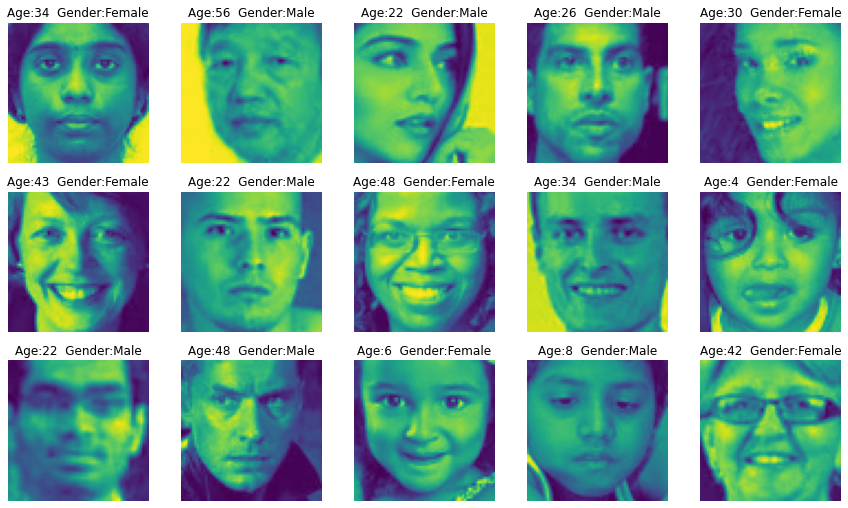

In [4]:
gender_dict = {0:"Male",1:"Female"}
def img_show(i):
    plt.imshow(images[i])
    plt.title(f"Age:{ages[i]}  Gender:{gender_dict[genders[i]]}")
    plt.axis('off')
plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(5,5,i+1)
    img_show(i)

In [5]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [6]:
genders_f

array([1, 0, 0, ..., 1, 0, 0])

In [7]:
val,counts=np.unique(genders_f,return_counts=1)
print(val)
print(counts)

[0 1]
[12391 11317]


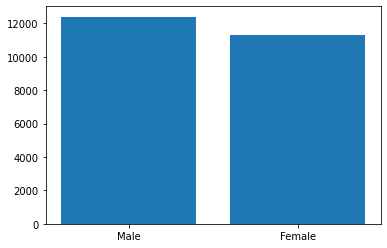

In [8]:
gen=["Male","Female"]
plt.bar(gen,counts)
plt.show()

In [9]:
ages_f

array([34, 56, 22, ...,  8, 29, 37])

In [10]:
val,counts=np.unique(ages_f,return_counts=1)
print(val)
print(counts)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 103 105 110 111 115 116]
[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [11]:
z=np.unique(ages_f)
z.shape

(104,)

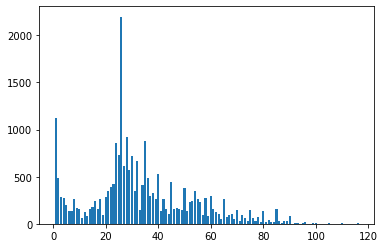

In [12]:
plt.bar(val,counts)
plt.show()

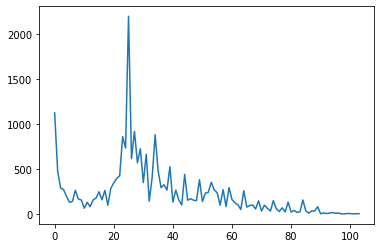

In [13]:
plt.plot(counts)
plt.show()

#  Splitting

In [14]:
labels=[]
j=0
while j<len(ages):
    label=[]
    label.append(ages[j])
    label.append(genders[j])
    labels.append(label)
    j=j+1
labels

[[34, 1],
 [56, 0],
 [22, 0],
 [26, 0],
 [30, 1],
 [43, 1],
 [22, 0],
 [48, 1],
 [34, 0],
 [4, 1],
 [22, 0],
 [48, 0],
 [6, 1],
 [8, 0],
 [42, 1],
 [85, 1],
 [5, 1],
 [55, 0],
 [34, 0],
 [40, 1],
 [26, 0],
 [1, 1],
 [34, 0],
 [25, 0],
 [1, 1],
 [28, 1],
 [58, 1],
 [54, 0],
 [39, 1],
 [35, 0],
 [24, 1],
 [61, 0],
 [58, 0],
 [50, 0],
 [37, 1],
 [29, 0],
 [29, 1],
 [74, 1],
 [28, 0],
 [30, 1],
 [3, 1],
 [37, 1],
 [85, 0],
 [40, 0],
 [28, 0],
 [20, 0],
 [53, 0],
 [25, 0],
 [24, 1],
 [30, 1],
 [56, 0],
 [5, 0],
 [24, 0],
 [62, 0],
 [1, 0],
 [40, 1],
 [37, 0],
 [26, 0],
 [5, 0],
 [34, 0],
 [25, 1],
 [29, 1],
 [72, 0],
 [29, 0],
 [33, 1],
 [82, 0],
 [46, 0],
 [2, 1],
 [33, 1],
 [83, 1],
 [35, 0],
 [50, 0],
 [47, 1],
 [68, 0],
 [23, 1],
 [82, 0],
 [25, 1],
 [28, 1],
 [35, 0],
 [26, 1],
 [26, 1],
 [78, 0],
 [35, 0],
 [15, 1],
 [2, 1],
 [52, 1],
 [50, 0],
 [54, 0],
 [4, 0],
 [28, 1],
 [30, 1],
 [17, 1],
 [29, 1],
 [13, 0],
 [39, 0],
 [85, 0],
 [31, 1],
 [5, 0],
 [28, 1],
 [73, 0],
 [14, 1],
 [26

In [15]:
images_f_2 = images_f/255
images_f_2.shape

(23708, 64, 64)

In [16]:
labels_f=np.array(labels)
labels_f

array([[34,  1],
       [56,  0],
       [22,  0],
       ...,
       [ 8,  1],
       [29,  0],
       [37,  0]])

In [17]:
labels_2=[labels_f[:,1],labels_f[:,0]]
print(labels_2[1][0:5])
print(labels_2[0][0:5])

[34 56 22 26 30]
[1 0 0 0 1]


In [18]:
labels_f[:,1]

array([1, 0, 0, ..., 1, 0, 0])

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [20]:
X_train

array([[[0.09411765, 0.0627451 , 0.0745098 , ..., 0.15294118,
         0.15686275, 0.16078431],
        [0.08627451, 0.05882353, 0.05490196, ..., 0.16470588,
         0.16470588, 0.15294118],
        [0.03137255, 0.03137255, 0.02745098, ..., 0.16078431,
         0.16470588, 0.16078431],
        ...,
        [0.94117647, 0.94117647, 0.91372549, ..., 0.12156863,
         0.15686275, 0.10588235],
        [0.92156863, 0.90588235, 0.91372549, ..., 0.1372549 ,
         0.08235294, 0.12156863],
        [0.9372549 , 0.88627451, 0.9254902 , ..., 0.63137255,
         0.30980392, 0.11764706]],

       [[0.0627451 , 0.05882353, 0.05490196, ..., 0.08627451,
         0.08235294, 0.08235294],
        [0.05882353, 0.05098039, 0.04705882, ..., 0.0745098 ,
         0.0745098 , 0.0745098 ],
        [0.05490196, 0.05098039, 0.04313725, ..., 0.08235294,
         0.07843137, 0.0745098 ],
        ...,
        [0.01568627, 0.01568627, 0.01176471, ..., 0.11372549,
         0.11764706, 0.11764706],
        [0.0

In [21]:
y_train

array([[24,  0],
       [24,  1],
       [65,  0],
       ...,
       [17,  1],
       [45,  0],
       [ 8,  1]])

In [22]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

#  Buliding Model

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten

In [25]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [26]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(128,activation='relu')(flatten)
    dense_2=Dense(128,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='Gen_out')(drop_1)
    output_2=Dense(117,activation='sigmoid',name='Age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=['binary_crossentropy','sparse_categorical_crossentropy'],optimizer='Adam',metrics=['accuracy'])
    return model


In [27]:
Model=model((64,64,1))

In [28]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 62, 62, 32)   320         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 62, 62, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 62, 62, 32)   0           ['dropout[0][0]']                
                                                                                              

In [239]:
History = Model.fit(X_train,y_train_2,validation_data=(X_test,y_test_2),epochs=2)

Epoch 1/2
556/556 [==============================] - 201s 359ms/step - loss: 4.6866 - Gen_out_loss: 0.5830 - Age_out_loss: 4.0440 - Gen_out_accuracy: 0.6673 - Age_out_accuracy: 0.1043 - val_loss: 4.2735 - val_Gen_out_loss: 0.4377 - val_Age_out_loss: 3.7808 - val_Gen_out_accuracy: 0.8075 - val_Age_out_accuracy: 0.1373
Epoch 2/2
556/556 [==============================] - 200s 359ms/step - loss: 4.1088 - Gen_out_loss: 0.3806 - Age_out_loss: 3.6652 - Gen_out_accuracy: 0.8253 - Age_out_accuracy: 0.1339 - val_loss: 4.0484 - val_Gen_out_loss: 0.3647 - val_Age_out_loss: 3.6129 - val_Gen_out_accuracy: 0.8395 - val_Age_out_accuracy: 0.1441


In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
fle_s="Age_Gender_Detection.h5"
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=10,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [31]:
History = Model.fit(X_train,y_train_2,batch_size=64,validation_data=(X_test,y_test_2),epochs=50,callbacks=callback_list)

Epoch 1/50
278/278 [==============================] - ETA: 0s - loss: 4.8825 - Gen_out_loss: 0.6535 - Age_out_loss: 4.1588 - Gen_out_accuracy: 0.5856 - Age_out_accuracy: 0.0904
Epoch 1: val_loss improved from inf to 4.71819, saving model to Age_Gender_Detection.h5
278/278 [==============================] - 185s 659ms/step - loss: 4.8825 - Gen_out_loss: 0.6535 - Age_out_loss: 4.1588 - Gen_out_accuracy: 0.5856 - Age_out_accuracy: 0.0904 - val_loss: 4.7182 - val_Gen_out_loss: 0.5779 - val_Age_out_loss: 4.0984 - val_Gen_out_accuracy: 0.6961 - val_Age_out_accuracy: 0.0987
Epoch 2/50
278/278 [==============================] - ETA: 0s - loss: 4.3289 - Gen_out_loss: 0.4555 - Age_out_loss: 3.8228 - Gen_out_accuracy: 0.7869 - Age_out_accuracy: 0.1247
Epoch 2: val_loss improved from 4.71819 to 4.17213, saving model to Age_Gender_Detection.h5
278/278 [==============================] - 185s 664ms/step - loss: 4.3289 - Gen_out_loss: 0.4555 - Age_out_loss: 3.8228 - Gen_out_accuracy: 0.7869 - Age_out_

278/278 [==============================] - 184s 661ms/step - loss: 3.5039 - Gen_out_loss: 0.2333 - Age_out_loss: 3.1443 - Gen_out_accuracy: 0.8965 - Age_out_accuracy: 0.1701 - val_loss: 3.5878 - val_Gen_out_loss: 0.2604 - val_Age_out_loss: 3.2003 - val_Gen_out_accuracy: 0.8895 - val_Age_out_accuracy: 0.1699
Epoch 16/50
278/278 [==============================] - ETA: 0s - loss: 3.4790 - Gen_out_loss: 0.2276 - Age_out_loss: 3.1223 - Gen_out_accuracy: 0.9003 - Age_out_accuracy: 0.1710
Epoch 16: val_loss did not improve from 3.58782
278/278 [==============================] - 186s 668ms/step - loss: 3.4790 - Gen_out_loss: 0.2276 - Age_out_loss: 3.1223 - Gen_out_accuracy: 0.9003 - Age_out_accuracy: 0.1710 - val_loss: 3.6375 - val_Gen_out_loss: 0.2554 - val_Age_out_loss: 3.2520 - val_Gen_out_accuracy: 0.8924 - val_Age_out_accuracy: 0.1669
Epoch 17/50
278/278 [==============================] - ETA: 0s - loss: 3.4647 - Gen_out_loss: 0.2261 - Age_out_loss: 3.1066 - Gen_out_accuracy: 0.9013 - Age

Epoch 31/50
278/278 [==============================] - ETA: 0s - loss: 3.2724 - Gen_out_loss: 0.1827 - Age_out_loss: 2.9230 - Gen_out_accuracy: 0.9241 - Age_out_accuracy: 0.1959
Epoch 31: val_loss did not improve from 3.56006
278/278 [==============================] - 121s 435ms/step - loss: 3.2724 - Gen_out_loss: 0.1827 - Age_out_loss: 2.9230 - Gen_out_accuracy: 0.9241 - Age_out_accuracy: 0.1959 - val_loss: 3.5886 - val_Gen_out_loss: 0.2571 - val_Age_out_loss: 3.1644 - val_Gen_out_accuracy: 0.8978 - val_Age_out_accuracy: 0.1719
Epoch 32/50
278/278 [==============================] - ETA: 0s - loss: 3.2578 - Gen_out_loss: 0.1793 - Age_out_loss: 2.9098 - Gen_out_accuracy: 0.9239 - Age_out_accuracy: 0.1964
Epoch 32: val_loss did not improve from 3.56006
278/278 [==============================] - 101s 363ms/step - loss: 3.2578 - Gen_out_loss: 0.1793 - Age_out_loss: 2.9098 - Gen_out_accuracy: 0.9239 - Age_out_accuracy: 0.1964 - val_loss: 3.5938 - val_Gen_out_loss: 0.2602 - val_Age_out_loss:

#  Plotting result

In [37]:
Model.evaluate(X_test,y_test_2)

186/186 [==============================] - 5s 27ms/step - loss: 3.5601 - Gen_out_loss: 0.2596 - Age_out_loss: 3.1463 - Gen_out_accuracy: 0.8942 - Age_out_accuracy: 0.1728


[3.560060739517212,
 0.25959721207618713,
 3.1463077068328857,
 0.8942129015922546,
 0.17276868224143982]

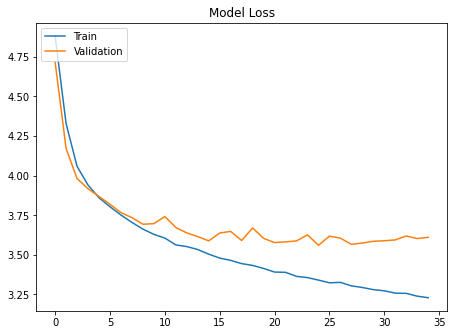

In [32]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title("Model Loss")
plt.xlabel=("Epoch")
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0, hspace=0.25,wspace=0.35)

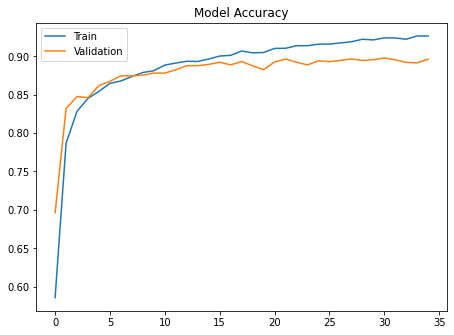

In [33]:
plt.plot(History.history['Gen_out_accuracy'])
plt.plot(History.history['val_Gen_out_accuracy'])
plt.title("Model Accuracy")
plt.xlabel=("Epoch")
plt.ylabel=('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0, hspace=0.25,wspace=0.35)

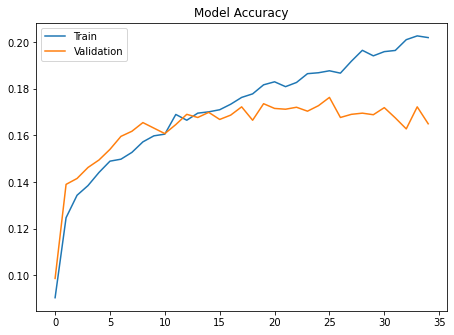

In [34]:
plt.plot(History.history['Age_out_accuracy'])
plt.plot(History.history['val_Age_out_accuracy'])
plt.title("Model Accuracy")
plt.xlabel=("Epoch")
plt.ylabel=('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0, hspace=0.25,wspace=0.35)

#  Testing Model

In [51]:
k=0
pred_gen=[]
while(k<len(pred[0])):
    pred_gen.append(int(np.round(pred[0][k])))
    k=k+1
print("Classification Report: \n", classification_report(y_test_2[0], pred_gen))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      3090
           1       0.92      0.85      0.89      2837

    accuracy                           0.89      5927
   macro avg       0.90      0.89      0.89      5927
weighted avg       0.90      0.89      0.89      5927



In [53]:
pred=Model.predict(X_test)
pred_age = [np.argmax(element) for element in pred[1]]
print("Classification Report: \n", classification_report(y_test_2[1], pred_age))

186/186 [==============================] - 5s 26ms/step
Classification Report: 
               precision    recall  f1-score   support

           1       0.64      0.94      0.76       289
           2       0.44      0.10      0.16       113
           3       0.18      0.06      0.09        69
           4       0.24      0.23      0.24        79
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        20
           7       0.18      0.35      0.23        37
           8       0.19      0.30      0.23        67
           9       0.11      0.20      0.14        30
          10       0.08      0.19      0.12        31
          11       0.00      0.00      0.00        24
          12       0.12      0.03      0.05        35
          13       0.00      0.00      0.00        17
          14       0.12      0.05      0.07        37
          15       0.00      0.00      0.00        46
          16       0.15      0.14      0.15        69


C:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


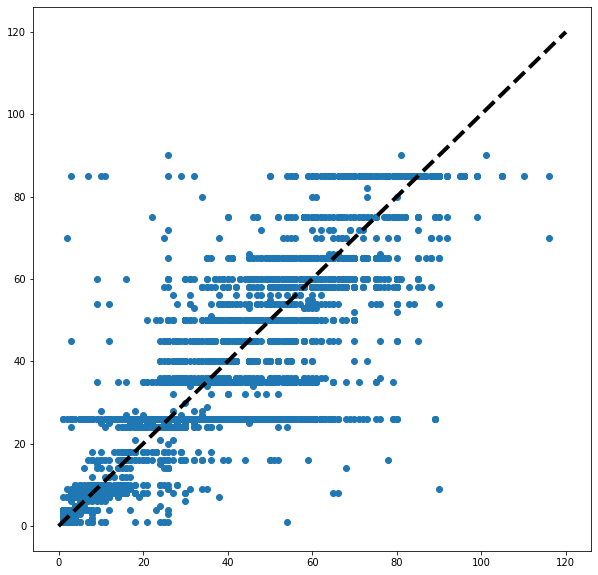

In [67]:
plt.figure(figsize=(10,10))
plt.scatter(y_test_2[1],pred_age) 
#plt.plot([y_test_2[1].min(),y_test_2[1].max()], [y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4) 
plt.plot([0,120],[0,120],'k--',lw=4) 
plt.xlabel=('Actual Age') 
plt.ylabel=('Predicted Age') 
plt.show()

In [25]:
#loading best model
from keras.models import load_model
model = load_model('Age_Gender_Detection.h5')

In [34]:

pred=model.predict(X_test)
k=0
pred_gen=[]
while(k<len(pred[0])):
    pred_gen.append(int(np.round(pred[0][k])))
    k=k+1
pred_age = [np.argmax(element) for element in pred[1]]

186/186 [==============================] - 10s 54ms/step


In [109]:
def get_age(j):
    if j >= 0 and j <= 5:return "0-5"
    if j >5   and j <= 10:return "6-10"
    if j >10  and j <= 14:return "11-14"
    if j >15  and j <= 18:return "15-18"
    if j >18  and j <= 25:return "19-25"
    if j >25  and j <= 35:return "26-35"
    if j >35  and j <= 50:return "36-50"
    if j >50  and j <= 60:return "51-60"
    if j >60  and j <= 80:return "61-80"
    if j >80  and j <= 100:return "81-100"
    if j >100  and j <= 120:return "101-120"
    return "Unknown"

def test(i):
    ig=X_test[i]
    ig = cv2.normalize(ig, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    rgb_image = cv2.cvtColor(ig, cv2.COLOR_GRAY2RGB)
    img = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2XYZ)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual:- Age:{y_test_2[1][i]}  Gender:{gender_dict[y_test_2[0][i]]} \
    \nPredicted:- Age:{pred_age[i]}  Gender:{gen[pred_gen[i]]} \
    \n Age Range {get_age(pred_age[i])}")
    

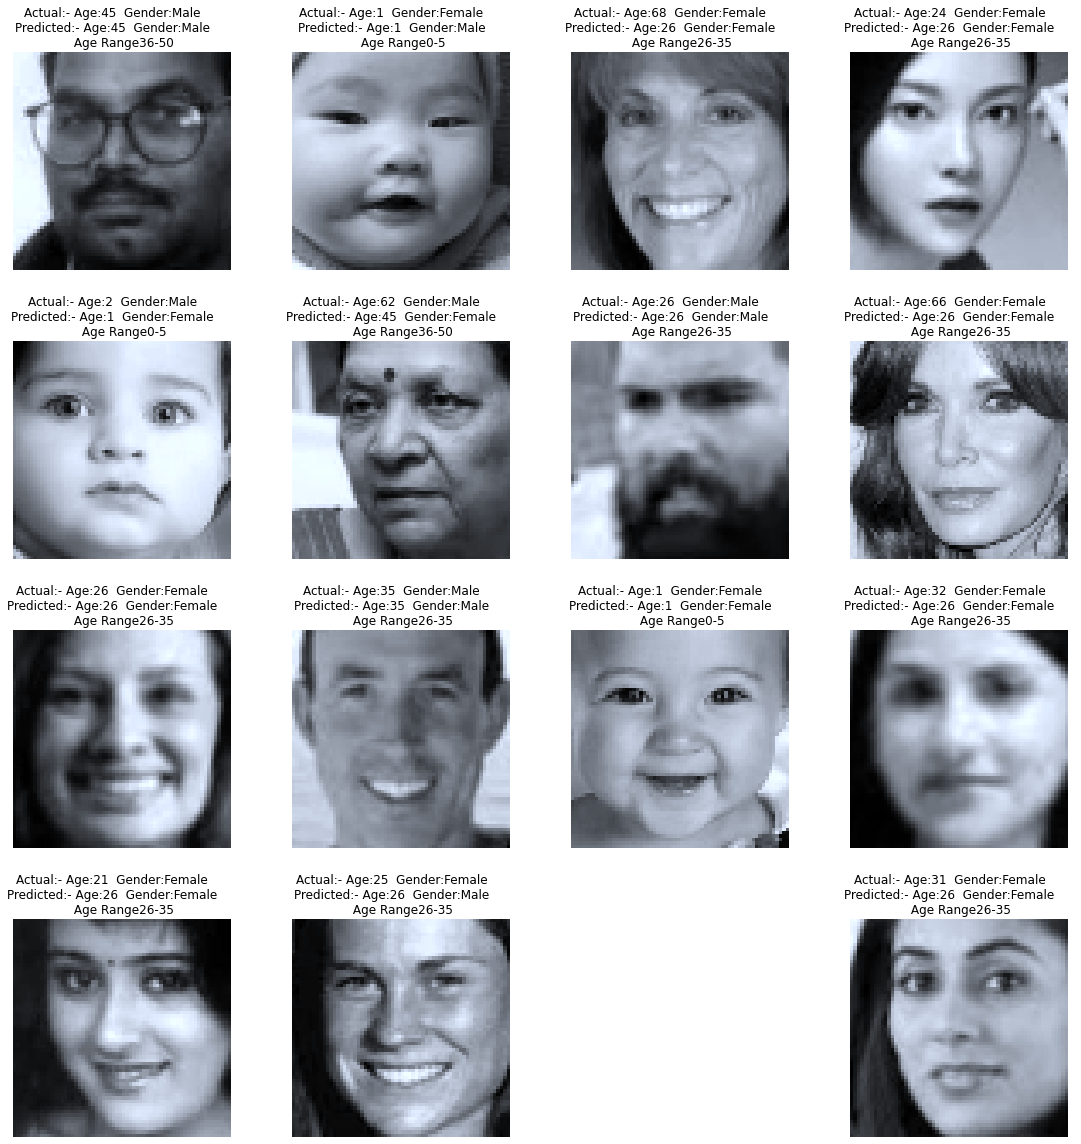

In [110]:
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    test(i)
    i+=1
    plt.tight_layout(h_pad=2.5,w_pad=2.0)

### Testing on random image

In [46]:
fd="./Test"
files=os.listdir(fd)
img=[]
for f in files:
    total=fd+'/'+f
    print(total)
    image =cv2.imread(total)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image=cv2.resize(image,(64,64))
    img.append(image)

./Test/10 1.jpg
./Test/10 2.jpg
./Test/100 1.jpg
./Test/100 2.jpg
./Test/15 1.jpg
./Test/15 2.jpg
./Test/20 1.jpg
./Test/20 2.jpg
./Test/30 1.jpg
./Test/30 2.jpg
./Test/40 1.jpg
./Test/40 2.jpg
./Test/50 1.jpg
./Test/50 2.jpg
./Test/5_1.jpg
./Test/5_2.jpg
./Test/5_3.jpg
./Test/60 1.jpg
./Test/60 2.jpg
./Test/80 1.jpg
./Test/80 2.jpg
./Test/black 0 0 3.jpg
./Test/black 0 1 2.jpg
./Test/blue 0 0 3.jpg
./Test/blue 0 1 1.jpg
./Test/blue 0 1 2.jpg
./Test/brown 0 0 3.jpg
./Test/brown 0 1 2.jpg
./Test/brown 1 1 7.jpg
./Test/brown 1 1 8.jpg
./Test/green 0 0 2.jpg


In [47]:
img_f=np.array(img)
img_f_2=img_f/255

In [48]:
#loading best model
from keras.models import load_model
model = load_model('Age_Gender_Detection.h5')
pred=model.predict(img_f_2)
k=0
pred_gen=[]
while(k<len(pred[0])):
    pred_gen.append(int(np.round(pred[0][k])))
    k=k+1
pred_age = [np.argmax(element) for element in pred[1]]

1/1 [==============================] - 0s 196ms/step


In [49]:
def get_age(j):
    if j >= 0 and j <= 5:return "0-5"
    if j >5   and j <= 10:return "6-10"
    if j >10  and j <= 14:return "11-14"
    if j >15  and j <= 18:return "15-18"
    if j >18  and j <= 25:return "19-25"
    if j >25  and j <= 35:return "26-35"
    if j >35  and j <= 50:return "36-50"
    if j >50  and j <= 60:return "51-60"
    if j >60  and j <= 80:return "61-80"
    if j >80  and j <= 100:return "81-100"
    if j >100  and j <= 120:return "101-120"
    return "Unknown"

def test(i):
    ig=img_f_2[i]
    ig = cv2.normalize(ig, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    rgb_image = cv2.cvtColor(ig, cv2.COLOR_GRAY2RGB)
    img = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2XYZ)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f" Age:{pred_age[i]}  Gender:{gen[pred_gen[i]]} \
    \n Age Range {get_age(pred_age[i])}")
    

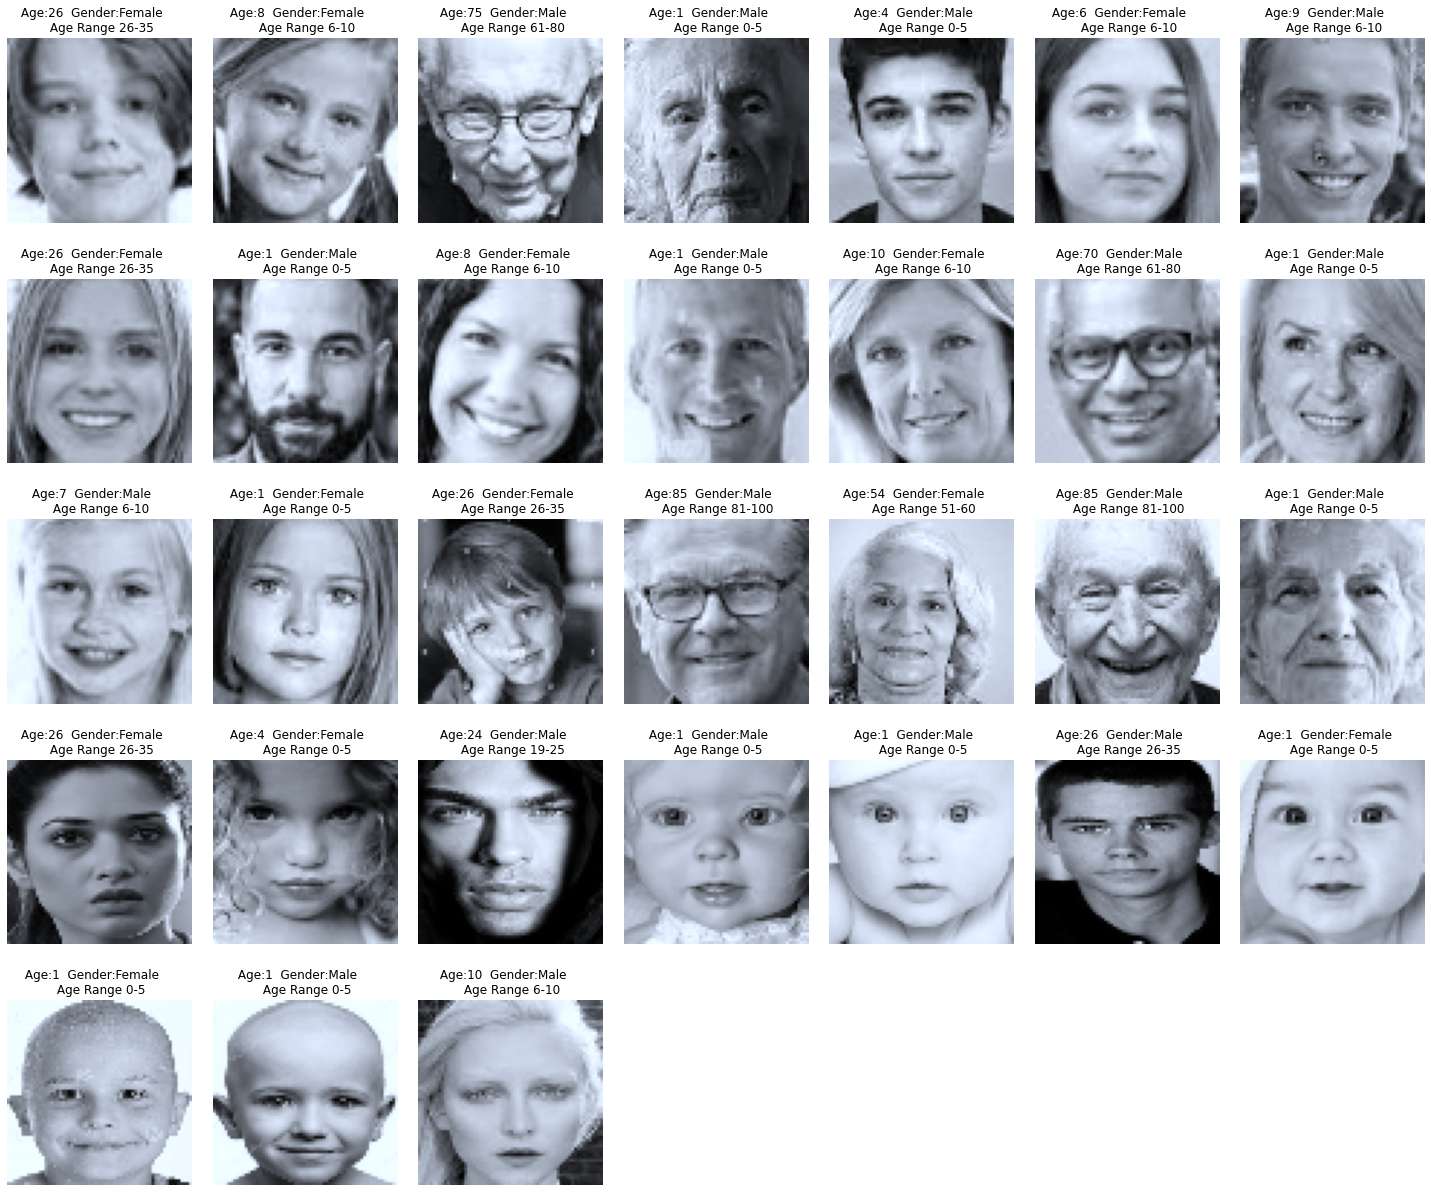

In [50]:
plt.figure(figsize=(20,20))
for i in range(len(img)):
    plt.subplot(6,7,i+1)
    test(i)
    i+=1
    plt.tight_layout(h_pad=2.5,w_pad=2.0)

# GUI

In [63]:
# Importing Necessary Libraries
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import Image, ImageTk
import numpy as np
from keras.models import load_model
import cv2

# Loading the Model
model = load_model('Age_Gender_Detection.h5')


# Initializing the GUI
root = tk.Tk()
root.geometry('800x600')
root.minsize(600,600)
root.maxsize(1920,1080)
root.configure(background="skyblue")
root.title("Pankaj's Age Gender Detection")


# Initializing the Labels 
f1 = Frame(root, bg="grey", borderwidth=6, relief=SUNKEN)
f1.pack(side=TOP,fill=X)
f2 = Frame(root, bg="silver", borderwidth=6, relief=SUNKEN)
f2.pack(side=LEFT,fill=Y)
f3 = Frame(root, bg="silver", borderwidth=6, relief=SUNKEN)
f3.pack(side=RIGHT,fill=Y)
f4 = Frame(root, bg="silver", borderwidth=6, relief=SUNKEN)
f4.pack(side=BOTTOM,fill=X)
f5 =Frame(root, bg="silver", borderwidth=6, relief=SUNKEN)
f5.pack(side=TOP,pady=20,padx=20)
label0 = Label(f4,text="  " ,background="silver", font=('lucida', 30, "bold")).pack()
label01 = Label(f2,text="   " ,background="gray64", font=('lucida', 15, "bold")).pack()
label02= Label(f3,text="   " ,background="gray64", font=('lucida', 15, "bold")).pack()

label1 = Label(f5, background="#CDCDCD", font=('lucida', 15, "bold"))
label2 = Label(f5, background="#CDCDCD", font=('lucida', 15, 'bold'))
label3 = Label(f5, background="#CDCDCD", font=('lucida', 15, 'bold'))
sign_image = Label(root)
label1.configure(text='Gender   :  ',foreground="red")
label2.configure(text='Age   :  ',foreground="blue")
label3.configure(text='Age range :  ',foreground="green")

# Detect faces in the image
def detect_faces(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    if len(faces) > 0:
        (x, y, w, h) = faces[0]
        face_image = image[y:y+h, x:x+w]
    else:
        face_image =image
        
    img2 = cv2.resize(face_image,(64,64))
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    img2 = np.array(img2)
    img2 = np.array([img2]) / 255
    return img2

# Defining Detect function which detects the age and gender of the person in an image using the model
def get_age(j):
    if j >= 0 and j <= 5:return "0-5"
    if j >5   and j <= 10:return "6-10"
    if j >10  and j <= 14:return "11-14"
    if j >15  and j <= 18:return "15-18"
    if j >18  and j <= 25:return "19-25"
    if j >25  and j <= 35:return "26-35"
    if j >35  and j <= 50:return "36-50"
    if j >50  and j <= 60:return "51-60"
    if j >60  and j <= 80:return "61-80"
    if j >80  and j <= 100:return "81-100"
    if j >100  and j <= 120:return "101-120"
    return "Unknown"


def Detect(file_path):
    global Label_packed
    image = Image.open(file_path)
    #image = cv2.imread(file_path)  
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image = cv2.resize(image,(64,64))
    #image = np.array(image)
    #image = np.array([image]) / 255
    gen=["Male", "Female"]
    img = detect_faces(file_path)
    pred=model.predict(img)
    age=int(np.argmax(pred[1][0]))
    gender=int(np.round(pred[0][0]))
    print("Predicted Gender is "+ gen[gender])
    print("Predicted Age is "+ str(age))
    print("Predicted Age range is " + get_age(age))
    label1.configure(foreground="red", text=f"Gender :  {gen[gender]}")
    label2.configure(foreground="blue", text=f"Age  :  {age}")
    label3.configure(foreground="green", text=f"Age range :  {get_age(age)}")

# Defining Show_detect button function
def show_Detect_button(file_path):
    try:
        Detect_b = Button(f4, text="Detect Image", command=lambda: Detect(file_path), padx=10, pady=5)
        Detect_b.configure(background="#364156", foreground='white', font=('arial', 10, 'bold'))
        Detect_b.place(relx=0.55, rely=0.1)
        
    except:
        pass

# Defining Upload Image Function
def upload_image():
    try:
        file_path = filedialog.askopenfilename(filetypes =[('Image Files', '*.jpg')])
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((root.winfo_width() / 2.25), (root.winfo_height() / 2.25)))
        im = ImageTk.PhotoImage(uploaded)
        label1.configure(text='Gender   :  ',foreground="red")
        label2.configure(text='Age   :  ',foreground="blue")
        label3.configure(text='Age range :  ',foreground="green")

        sign_image.configure(image=im)
        sign_image.image = im
        
        show_Detect_button(file_path)

    except:
        pass

upload = Button(f4, text="Upload an Image", command=upload_image, padx=10, pady=5)
upload.configure(background="#364156", foreground='white', font=('arial', 10, 'bold'))
upload.pack(side='bottom', pady=5)
upload.place(relx=0.3, rely=0.1)
sign_image.pack(side='bottom', expand=True)
label1.pack(side="bottom", expand=True)
label2.pack(side="bottom", expand=True)
label3.pack(side="bottom", expand=True)
heading = Label(f1, text="Age and Gender Detector", pady=10, font=('arial', 20, "bold"),)
heading.configure(background="silver", foreground="black")
heading.pack(fill=X)


root.mainloop()


No face detected in the image.
1/1 [==============================] - 0s 70ms/step
Predicted Gender is Male
Predicted Age is 1
Predicted Age range is 0-5
1/1 [==============================] - 0s 25ms/step
Predicted Gender is Male
Predicted Age is 1
Predicted Age range is 0-5
No face detected in the image.
1/1 [==============================] - 0s 17ms/step
Predicted Gender is Female
Predicted Age is 1
Predicted Age range is 0-5
